✅ Dataset loaded successfully from: /kaggle/input/dataset/diabetic_data.csv
Initial shape: (101766, 50)
🔍 EXPLORATORY DATA ANALYSIS

📊 TARGET VARIABLE DISTRIBUTION (readmitted)
--------------------------------------------------------------------------------
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Proportions:
readmitted
NO    0.5391
>30   0.3493
<30   0.1116
Name: proportion, dtype: float64

🎯 Binary Target Distribution:
readmitted_binary
0    90409
1    11357
Name: count, dtype: int64
Class Imbalance Ratio: 7.96:1


🔍 MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------
              Column  Missing_Count  Percentage
1             weight          98569     96.8585
3  medical_specialty          49949     49.0822
2         payer_code          40256     39.5574
0               race           2273      2.2336
6             diag_3           1423      1.3983
5             diag_2            358      0.35

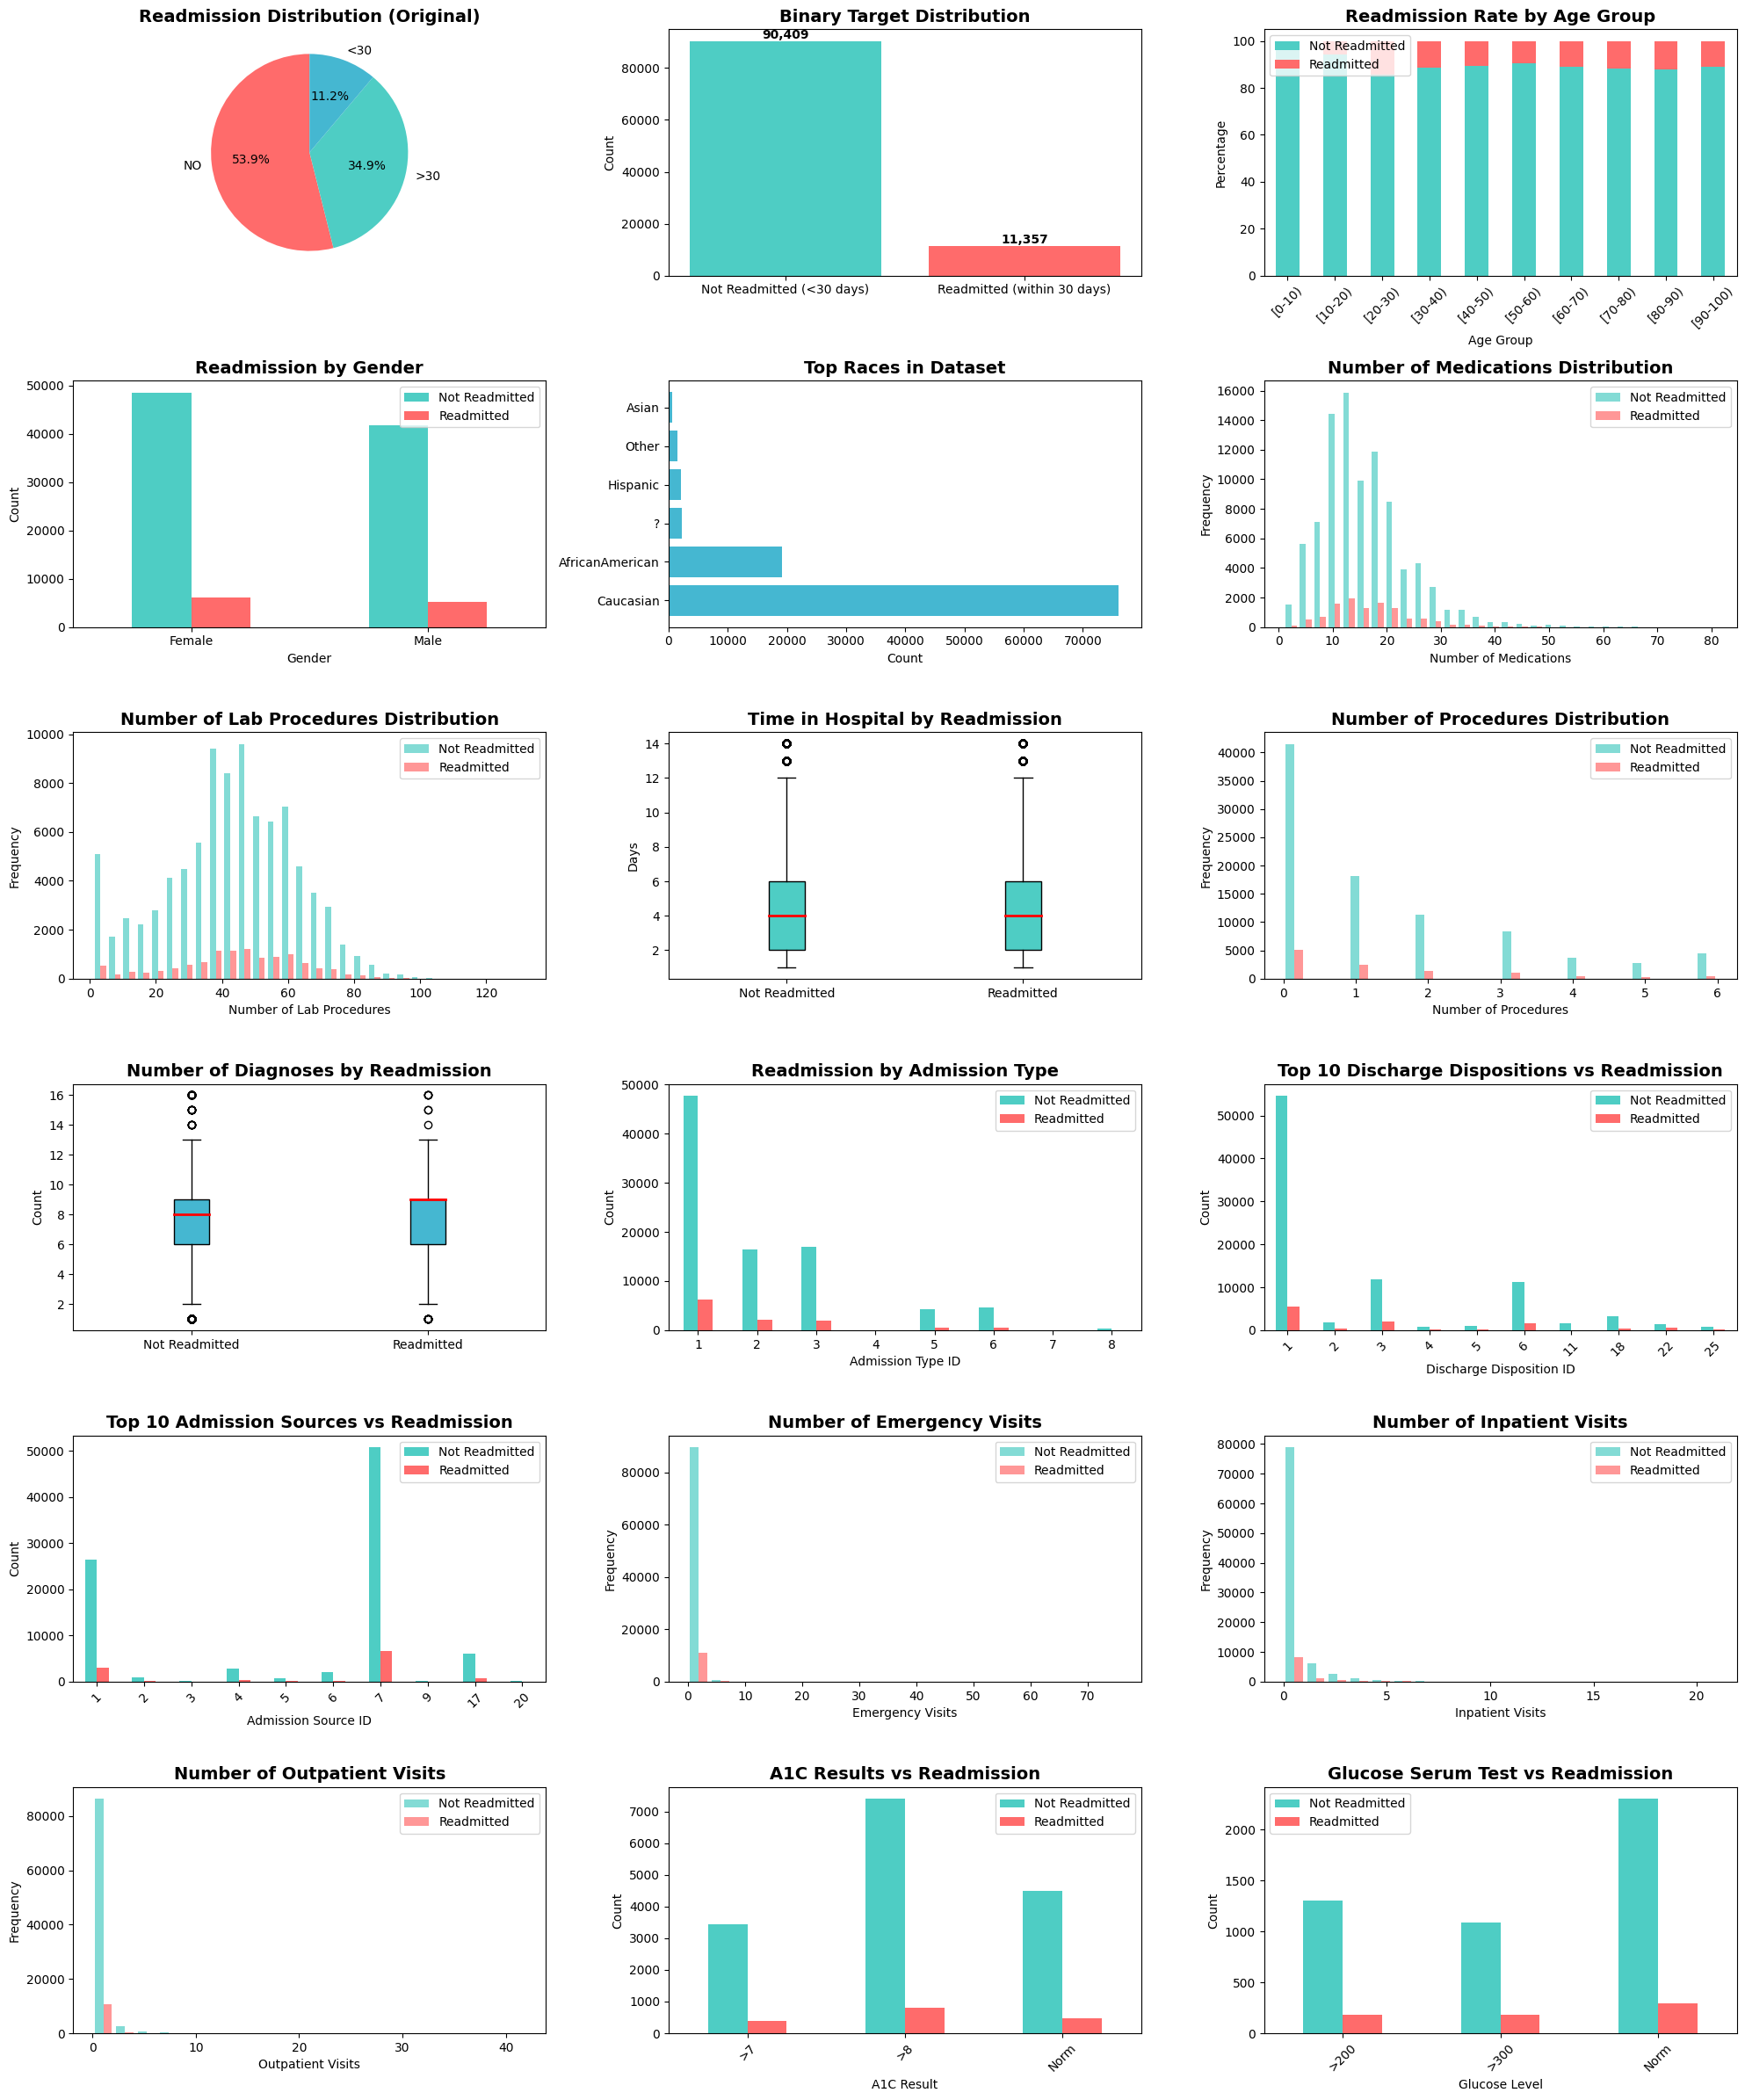



📊 CORRELATION ANALYSIS
--------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


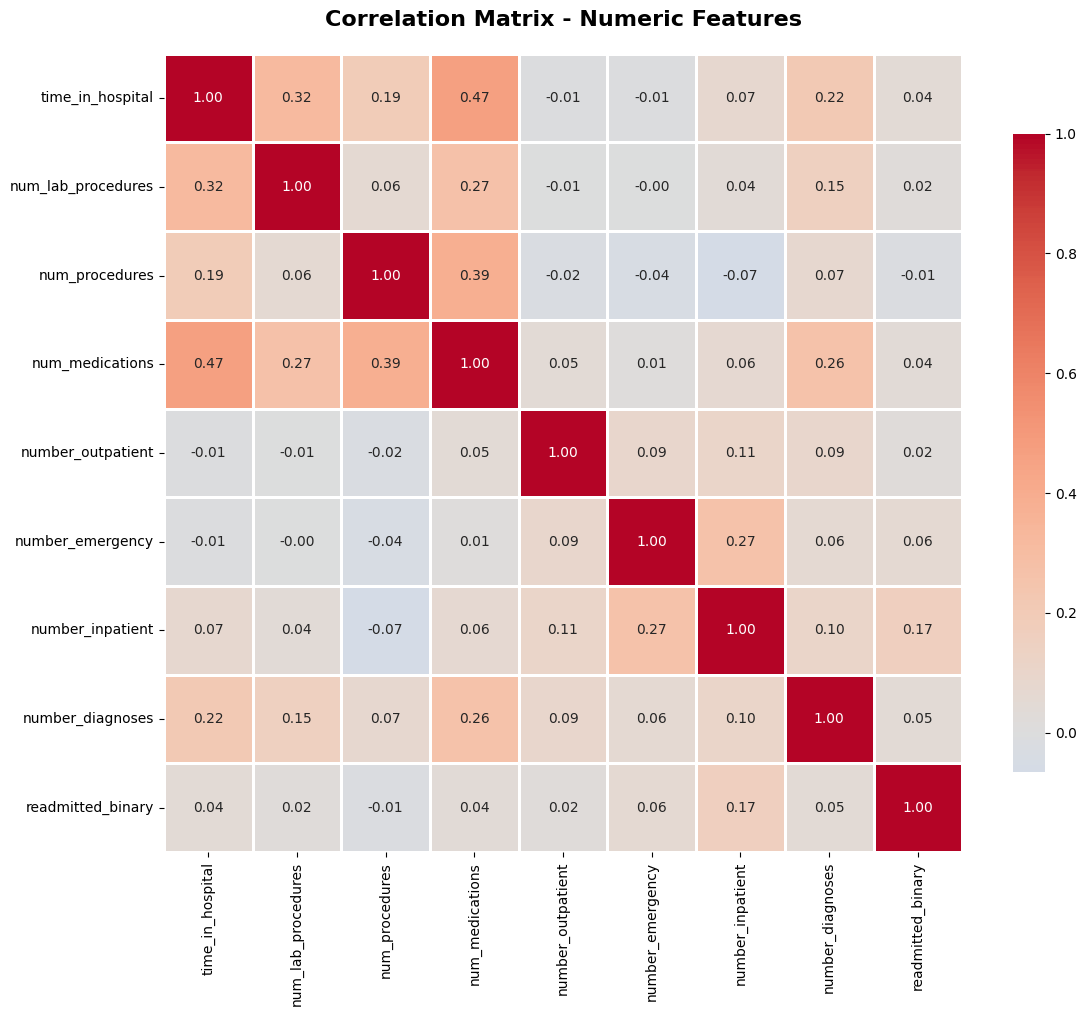


Top Correlations with Readmission:
readmitted_binary     1.0000
number_inpatient      0.1651
number_emergency      0.0607
number_diagnoses      0.0495
time_in_hospital      0.0442
num_medications       0.0384
num_lab_procedures    0.0204
number_outpatient     0.0189
num_procedures       -0.0122
Name: readmitted_binary, dtype: float64


📈 KEY STATISTICS BY READMISSION STATUS
--------------------------------------------------------------------------------

time_in_hospital:
                        count   mean    std    min    25%    50%    75%  \
readmitted_binary                                                         
0                 90,409.0000 4.3492 2.9764 1.0000 2.0000 4.0000 6.0000   
1                 11,357.0000 4.7682 3.0282 1.0000 2.0000 4.0000 6.0000   

                      max  
readmitted_binary          
0                 14.0000  
1                 14.0000  

num_lab_procedures:
                        count    mean     std    min     25%     50%     75%  \
readmitt

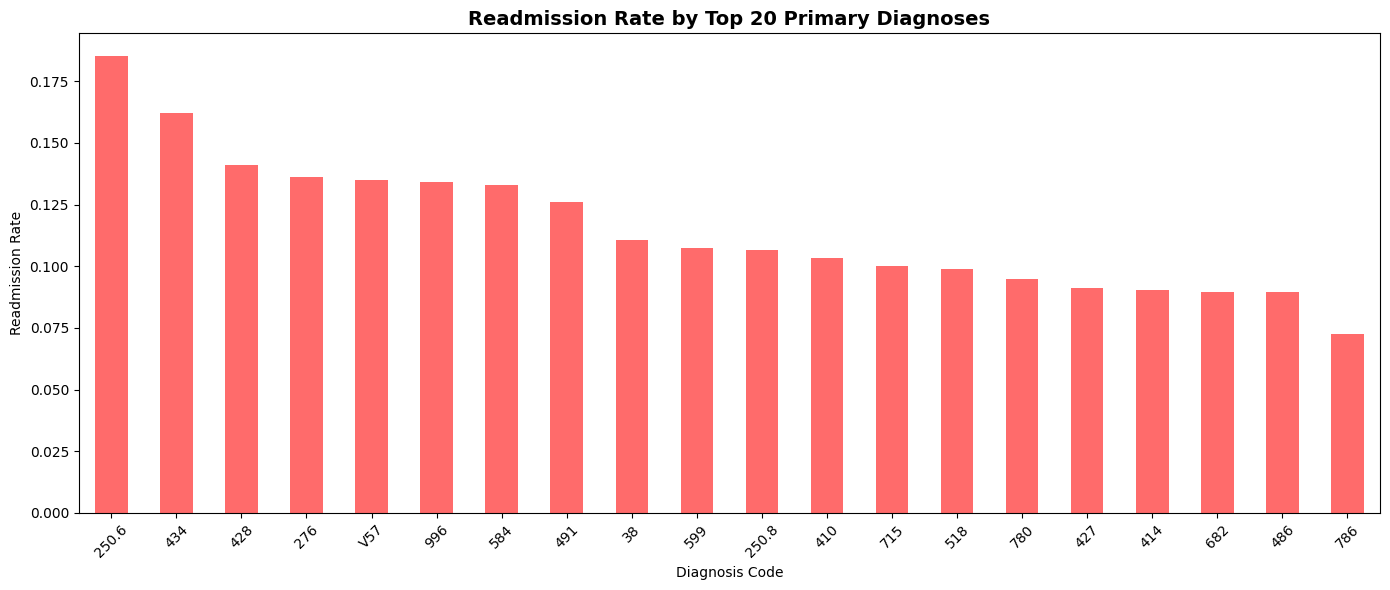


✅ EDA COMPLETE


In [2]:
# ============================================================================
# COMPREHENSIVE EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================


# ============================================================================
# INITIALIZATION AND DATA LOADING
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

# Define the dataset path as provided by the user
DATASET_PATH = '/kaggle/input/dataset/diabetic_data.csv'

# Load the dataset
try:
    df = pd.read_csv(DATASET_PATH)
    print(f"✅ Dataset loaded successfully from: {DATASET_PATH}")
    print(f"Initial shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ ERROR: File not found at {DATASET_PATH}. Please verify the path.")
    # Create an empty DataFrame to prevent immediate errors, though subsequent code will fail
    df = pd.DataFrame() 
    
# Suppress scientific notation for clearer output
pd.options.display.float_format = '{:,.4f}'.format

print("="*80)
print("🔍 EXPLORATORY DATA ANALYSIS")
print("="*80)

# -----------------------------------------------------------------------------
# 1. TARGET VARIABLE ANALYSIS
# -----------------------------------------------------------------------------
print("\n📊 TARGET VARIABLE DISTRIBUTION (readmitted)")
print("-" * 80)
target_dist = df['readmitted'].value_counts()
print(target_dist)
print(f"\nProportions:\n{df['readmitted'].value_counts(normalize=True)}")

# Create binary target for analysis
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
print(f"\n🎯 Binary Target Distribution:")
print(df['readmitted_binary'].value_counts())
print(f"Class Imbalance Ratio: {df['readmitted_binary'].value_counts()[0] / df['readmitted_binary'].value_counts()[1]:.2f}:1")

# -----------------------------------------------------------------------------
# 2. MISSING VALUES ANALYSIS
# -----------------------------------------------------------------------------
print("\n\n🔍 MISSING VALUES ANALYSIS")
print("-" * 80)

# Check for '?' as missing indicator
missing_counts = {}
for col in df.columns:
    if df[col].dtype == 'object':
        question_marks = (df[col] == '?').sum()
        if question_marks > 0:
            missing_counts[col] = question_marks

missing_df = pd.DataFrame(list(missing_counts.items()), columns=['Column', 'Missing_Count'])
missing_df['Percentage'] = (missing_df['Missing_Count'] / len(df)) * 100
missing_df = missing_df.sort_values('Missing_Count', ascending=False)
print(missing_df)

# Regular missing values
regular_missing = df.isnull().sum()
regular_missing = regular_missing[regular_missing > 0]
if len(regular_missing) > 0:
    print("\nRegular NULL values:")
    print(regular_missing)

# -----------------------------------------------------------------------------
# 3. VISUALIZATIONS
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=(20, 24))

# Plot 1: Target Distribution
plt.subplot(6, 3, 1)
target_counts = df['readmitted'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Readmission Distribution (Original)', fontsize=14, fontweight='bold')

plt.subplot(6, 3, 2)
binary_counts = df['readmitted_binary'].value_counts()
plt.bar(['Not Readmitted (<30 days)', 'Readmitted (within 30 days)'], 
        [binary_counts[0], binary_counts[1]], color=['#4ECDC4', '#FF6B6B'])
plt.title('Binary Target Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Count')
for i, v in enumerate([binary_counts[0], binary_counts[1]]):
    plt.text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# Plot 3: Age Distribution by Readmission
plt.subplot(6, 3, 3)
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
age_readmit = pd.crosstab(df['age'], df['readmitted_binary'], normalize='index') * 100
age_readmit = age_readmit.reindex(age_order)
age_readmit.plot(kind='bar', stacked=True, color=['#4ECDC4', '#FF6B6B'], ax=plt.gca())
plt.title('Readmission Rate by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(['Not Readmitted', 'Readmitted'], loc='upper left')
plt.xticks(rotation=45)

# Plot 4: Gender Distribution
plt.subplot(6, 3, 4)
gender_data = df[df['gender'].isin(['Male', 'Female'])].groupby(['gender', 'readmitted_binary']).size().unstack()
gender_data.plot(kind='bar', color=['#4ECDC4', '#FF6B6B'], ax=plt.gca())
plt.title('Readmission by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=0)

# Plot 5: Race Distribution
plt.subplot(6, 3, 5)
race_counts = df['race'].value_counts().head(6)
plt.barh(range(len(race_counts)), race_counts.values, color='#45B7D1')
plt.yticks(range(len(race_counts)), race_counts.index)
plt.title('Top Races in Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Count')

# Plot 6: Number of Medications
plt.subplot(6, 3, 6)
plt.hist([df[df['readmitted_binary']==0]['num_medications'], 
          df[df['readmitted_binary']==1]['num_medications']], 
         bins=30, label=['Not Readmitted', 'Readmitted'], color=['#4ECDC4', '#FF6B6B'], alpha=0.7)
plt.title('Number of Medications Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Medications')
plt.ylabel('Frequency')
plt.legend()

# Plot 7: Number of Lab Procedures
plt.subplot(6, 3, 7)
plt.hist([df[df['readmitted_binary']==0]['num_lab_procedures'], 
          df[df['readmitted_binary']==1]['num_lab_procedures']], 
         bins=30, label=['Not Readmitted', 'Readmitted'], color=['#4ECDC4', '#FF6B6B'], alpha=0.7)
plt.title('Number of Lab Procedures Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Frequency')
plt.legend()

# Plot 8: Time in Hospital
plt.subplot(6, 3, 8)
plt.boxplot([df[df['readmitted_binary']==0]['time_in_hospital'], 
             df[df['readmitted_binary']==1]['time_in_hospital']], 
            labels=['Not Readmitted', 'Readmitted'], patch_artist=True,
            boxprops=dict(facecolor='#4ECDC4'), medianprops=dict(color='red', linewidth=2))
plt.title('Time in Hospital by Readmission', fontsize=14, fontweight='bold')
plt.ylabel('Days')

# Plot 9: Number of Procedures
plt.subplot(6, 3, 9)
plt.hist([df[df['readmitted_binary']==0]['num_procedures'], 
          df[df['readmitted_binary']==1]['num_procedures']], 
         bins=20, label=['Not Readmitted', 'Readmitted'], color=['#4ECDC4', '#FF6B6B'], alpha=0.7)
plt.title('Number of Procedures Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Procedures')
plt.ylabel('Frequency')
plt.legend()

# Plot 10: Number of Diagnoses
plt.subplot(6, 3, 10)
plt.boxplot([df[df['readmitted_binary']==0]['number_diagnoses'], 
             df[df['readmitted_binary']==1]['number_diagnoses']], 
            labels=['Not Readmitted', 'Readmitted'], patch_artist=True,
            boxprops=dict(facecolor='#45B7D1'), medianprops=dict(color='red', linewidth=2))
plt.title('Number of Diagnoses by Readmission', fontsize=14, fontweight='bold')
plt.ylabel('Count')

# Plot 11: Admission Type
plt.subplot(6, 3, 11)
admission_readmit = pd.crosstab(df['admission_type_id'], df['readmitted_binary'])
admission_readmit.plot(kind='bar', color=['#4ECDC4', '#FF6B6B'], ax=plt.gca())
plt.title('Readmission by Admission Type', fontsize=14, fontweight='bold')
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=0)

# Plot 12: Discharge Disposition
plt.subplot(6, 3, 12)
discharge_top = df['discharge_disposition_id'].value_counts().head(10).index
discharge_data = df[df['discharge_disposition_id'].isin(discharge_top)]
discharge_readmit = pd.crosstab(discharge_data['discharge_disposition_id'], discharge_data['readmitted_binary'])
discharge_readmit.plot(kind='bar', color=['#4ECDC4', '#FF6B6B'], ax=plt.gca())
plt.title('Top 10 Discharge Dispositions vs Readmission', fontsize=14, fontweight='bold')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)

# Plot 13: Admission Source
plt.subplot(6, 3, 13)
source_top = df['admission_source_id'].value_counts().head(10).index
source_data = df[df['admission_source_id'].isin(source_top)]
source_readmit = pd.crosstab(source_data['admission_source_id'], source_data['readmitted_binary'])
source_readmit.plot(kind='bar', color=['#4ECDC4', '#FF6B6B'], ax=plt.gca())
plt.title('Top 10 Admission Sources vs Readmission', fontsize=14, fontweight='bold')
plt.xlabel('Admission Source ID')
plt.ylabel('Count')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)

# Plot 14: Number of Emergency Visits
plt.subplot(6, 3, 14)
plt.hist([df[df['readmitted_binary']==0]['number_emergency'], 
          df[df['readmitted_binary']==1]['number_emergency']], 
         bins=20, label=['Not Readmitted', 'Readmitted'], color=['#4ECDC4', '#FF6B6B'], alpha=0.7)
plt.title('Number of Emergency Visits', fontsize=14, fontweight='bold')
plt.xlabel('Emergency Visits')
plt.ylabel('Frequency')
plt.legend()

# Plot 15: Number of Inpatient Visits
plt.subplot(6, 3, 15)
plt.hist([df[df['readmitted_binary']==0]['number_inpatient'], 
          df[df['readmitted_binary']==1]['number_inpatient']], 
         bins=20, label=['Not Readmitted', 'Readmitted'], color=['#4ECDC4', '#FF6B6B'], alpha=0.7)
plt.title('Number of Inpatient Visits', fontsize=14, fontweight='bold')
plt.xlabel('Inpatient Visits')
plt.ylabel('Frequency')
plt.legend()

# Plot 16: Number of Outpatient Visits
plt.subplot(6, 3, 16)
plt.hist([df[df['readmitted_binary']==0]['number_outpatient'], 
          df[df['readmitted_binary']==1]['number_outpatient']], 
         bins=20, label=['Not Readmitted', 'Readmitted'], color=['#4ECDC4', '#FF6B6B'], alpha=0.7)
plt.title('Number of Outpatient Visits', fontsize=14, fontweight='bold')
plt.xlabel('Outpatient Visits')
plt.ylabel('Frequency')
plt.legend()

# Plot 17: A1C Result
plt.subplot(6, 3, 17)
a1c_data = df[df['A1Cresult'] != '?']
a1c_readmit = pd.crosstab(a1c_data['A1Cresult'], a1c_data['readmitted_binary'])
a1c_readmit.plot(kind='bar', color=['#4ECDC4', '#FF6B6B'], ax=plt.gca())
plt.title('A1C Results vs Readmission', fontsize=14, fontweight='bold')
plt.xlabel('A1C Result')
plt.ylabel('Count')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)

# Plot 18: Glucose Serum Test Result
plt.subplot(6, 3, 18)
glucose_data = df[df['max_glu_serum'] != '?']
glucose_readmit = pd.crosstab(glucose_data['max_glu_serum'], glucose_data['readmitted_binary'])
glucose_readmit.plot(kind='bar', color=['#4ECDC4', '#FF6B6B'], ax=plt.gca())
plt.title('Glucose Serum Test vs Readmission', fontsize=14, fontweight='bold')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('eda_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 4. CORRELATION ANALYSIS
# -----------------------------------------------------------------------------
print("\n\n📊 CORRELATION ANALYSIS")
print("-" * 80)

# Select numeric columns for correlation
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                'num_medications', 'number_outpatient', 'number_emergency', 
                'number_inpatient', 'number_diagnoses', 'readmitted_binary']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop Correlations with Readmission:")
readmit_corr = corr_matrix['readmitted_binary'].sort_values(ascending=False)
print(readmit_corr)

# -----------------------------------------------------------------------------
# 5. KEY STATISTICS BY TARGET
# -----------------------------------------------------------------------------
print("\n\n📈 KEY STATISTICS BY READMISSION STATUS")
print("-" * 80)

for col in numeric_cols[:-1]:  # Exclude target
    print(f"\n{col}:")
    print(df.groupby('readmitted_binary')[col].describe())

# -----------------------------------------------------------------------------
# 6. MEDICATION ANALYSIS
# -----------------------------------------------------------------------------
print("\n\n💊 MEDICATION CHANGE ANALYSIS")
print("-" * 80)

medication_cols = ['diabetesMed', 'change']
for col in medication_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(pd.crosstab(df[col], df['readmitted_binary'], normalize='index') * 100)

# -----------------------------------------------------------------------------
# 7. PRIMARY DIAGNOSES ANALYSIS
# -----------------------------------------------------------------------------
print("\n\n🏥 PRIMARY DIAGNOSES (diag_1) ANALYSIS")
print("-" * 80)

top_diagnoses = df['diag_1'].value_counts().head(20)
print("Top 20 Primary Diagnoses:")
print(top_diagnoses)

# Readmission rate by top diagnoses
diag_data = df[df['diag_1'].isin(top_diagnoses.index)]
diag_readmit_rate = diag_data.groupby('diag_1')['readmitted_binary'].mean().sort_values(ascending=False)
print("\nReadmission Rate by Top Diagnoses:")
print(diag_readmit_rate)

plt.figure(figsize=(14, 6))
diag_readmit_rate.plot(kind='bar', color='#FF6B6B')
plt.title('Readmission Rate by Top 20 Primary Diagnoses', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis Code')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('diagnoses_readmission_rate.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("✅ EDA COMPLETE")
print("="*80)

In [4]:
# ============================================================================
# INSTALL DEPENDENCIES & DATA PREPROCESSING
# ============================================================================
!pip install -q imbalanced-learn==0.12.2


import pandas as pd
import numpy as np
import os
import json
import joblib
from datetime import datetime

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Although you import it inside a block, better to put here
from sklearn.compose import ColumnTransformer # Assuming this is used in your preproc step (from the prior context)
from sklearn.pipeline import Pipeline # Assuming this is used in your preproc step (from the prior context)

# Imbalance handling and encoding imports (already in your code but listed for completeness)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

print("\n" + "="*80)
print("🔧 DATA PREPROCESSING & FEATURE ENGINEERING")
print("="*80)

# Make a copy for processing
df_processed = df.copy()

# -----------------------------------------------------------------------------
# 1. HANDLE DUPLICATES
# -----------------------------------------------------------------------------
print("\n📋 HANDLING DUPLICATES")
print("-" * 80)

print(f"Total records before: {len(df_processed):,}")
print(f"Duplicate patient encounters: {df_processed.duplicated(subset=['patient_nbr', 'encounter_id']).sum()}")

# Keep first encounter for each patient to avoid data leakage
df_processed = df_processed.drop_duplicates(subset=['patient_nbr'], keep='first')
print(f"Total records after removing duplicates: {len(df_processed):,}")

# -----------------------------------------------------------------------------
# 2. CREATE BINARY TARGET
# -----------------------------------------------------------------------------
print("\n🎯 CREATING BINARY TARGET")
print("-" * 80)

df_processed['target'] = df_processed['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
print(f"Target distribution:\n{df_processed['target'].value_counts()}")
print(f"Positive class percentage: {df_processed['target'].mean()*100:.2f}%")

# -----------------------------------------------------------------------------
# 3. REMOVE IRRELEVANT COLUMNS
# -----------------------------------------------------------------------------
print("\n🗑️ REMOVING IRRELEVANT COLUMNS")
print("-" * 80)

# Columns to drop
drop_cols = [
    'encounter_id', 'patient_nbr',  # Identifiers
    'readmitted', 'readmitted_binary',  # Original target
    'weight', 'payer_code', 'medical_specialty',  # >40% missing
    'examide', 'citoglipton'  # Medications with no variation
]

# Check if columns exist before dropping
drop_cols = [col for col in drop_cols if col in df_processed.columns]
print(f"Dropping columns: {drop_cols}")
df_processed = df_processed.drop(columns=drop_cols)

print(f"Remaining features: {df_processed.shape[1] - 1}")  # -1 for target

# -----------------------------------------------------------------------------
# 4. HANDLE MISSING VALUES (?)
# -----------------------------------------------------------------------------
print("\n🔍 HANDLING MISSING VALUES")
print("-" * 80)

# Replace '?' with np.nan
for col in df_processed.columns:
    if df_processed[col].dtype == 'object':
        df_processed[col] = df_processed[col].replace('?', np.nan)

# Check missing percentages
missing_pct = (df_processed.isnull().sum() / len(df_processed)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
print(f"Columns with missing values:\n{missing_pct}")

# Drop columns with >50% missing
high_missing = missing_pct[missing_pct > 50].index.tolist()
if high_missing:
    print(f"\nDropping columns with >50% missing: {high_missing}")
    df_processed = df_processed.drop(columns=high_missing)

# -----------------------------------------------------------------------------
# 5. FEATURE ENGINEERING
# -----------------------------------------------------------------------------
print("\n\n⚙️ FEATURE ENGINEERING")
print("-" * 80)

# 5.1 Polypharmacy Indicator
df_processed['polypharmacy'] = (df_processed['num_medications'] > 10).astype(int)
print("✓ Created polypharmacy indicator (>10 medications)")

# 5.2 High Lab Procedures
df_processed['high_lab_procedures'] = (df_processed['num_lab_procedures'] > df_processed['num_lab_procedures'].median()).astype(int)
print("✓ Created high_lab_procedures indicator")

# 5.3 Multiple Emergency Visits
df_processed['multiple_emergency'] = (df_processed['number_emergency'] > 0).astype(int)
print("✓ Created multiple_emergency indicator")

# 5.4 Multiple Inpatient Visits
df_processed['multiple_inpatient'] = (df_processed['number_inpatient'] > 0).astype(int)
print("✓ Created multiple_inpatient indicator")

# 5.5 High Number of Diagnoses
df_processed['high_diagnoses'] = (df_processed['number_diagnoses'] >= 7).astype(int)
print("✓ Created high_diagnoses indicator (≥7)")

# 5.6 Long Hospital Stay
df_processed['long_hospital_stay'] = (df_processed['time_in_hospital'] > 7).astype(int)
print("✓ Created long_hospital_stay indicator (>7 days)")

# 5.7 High Procedures
df_processed['high_procedures'] = (df_processed['num_procedures'] > 3).astype(int)
print("✓ Created high_procedures indicator (>3)")

# 5.8 Total Visits (Emergency + Inpatient + Outpatient)
df_processed['total_visits'] = (df_processed['number_emergency'] + 
                                  df_processed['number_inpatient'] + 
                                  df_processed['number_outpatient'])
print("✓ Created total_visits feature")

# 5.9 Age Group Numeric
age_mapping = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
    '[80-90)': 85, '[90-100)': 95
}
df_processed['age_numeric'] = df_processed['age'].map(age_mapping)
print("✓ Created age_numeric feature")

# 5.10 Diabetes Medication Change
df_processed['diabetes_med_change'] = (
    (df_processed['diabetesMed'] == 'Yes') & (df_processed['change'] == 'Ch')
).astype(int)
print("✓ Created diabetes_med_change feature")

# 5.11 Chronic Illness Flags from Diagnoses
def create_diagnosis_flags(df):
    """Create flags for chronic conditions based on ICD-9 codes"""
    
    diag_cols = ['diag_1', 'diag_2', 'diag_3']
    
    # Initialize flags
    df['has_diabetes'] = 0
    df['has_circulatory'] = 0
    df['has_respiratory'] = 0
    df['has_digestive'] = 0
    df['has_injury'] = 0
    df['has_musculoskeletal'] = 0
    df['has_genitourinary'] = 0
    
    for col in diag_cols:
        if col in df.columns:
            # Convert to string and handle missing
            diag = df[col].fillna('0').astype(str)
            
            # Diabetes: 250.xx
            df['has_diabetes'] |= diag.str.startswith('250').astype(int)
            
            # Extract numeric part (first 3 characters) safely
            def safe_numeric_check(code_series, lower, upper):
                """Safely check if numeric codes fall in range"""
                result = pd.Series(0, index=code_series.index)
                # Get first 3 characters
                first_three = code_series.str[:3]
                # Check if numeric
                is_numeric = first_three.str.match(r'^\d+$', na=False)
                # Convert to float and check range only for numeric values
                numeric_vals = pd.to_numeric(first_three, errors='coerce')
                in_range = (numeric_vals >= lower) & (numeric_vals <= upper)
                result[is_numeric & in_range] = 1
                return result
            
            # Circulatory: 390-459
            df['has_circulatory'] |= safe_numeric_check(diag, 390, 459)
            
            # Respiratory: 460-519
            df['has_respiratory'] |= safe_numeric_check(diag, 460, 519)
            
            # Digestive: 520-579
            df['has_digestive'] |= safe_numeric_check(diag, 520, 579)
            
            # Injury: 800-999
            df['has_injury'] |= safe_numeric_check(diag, 800, 999)
            
            # Musculoskeletal: 710-739
            df['has_musculoskeletal'] |= safe_numeric_check(diag, 710, 739)
            
            # Genitourinary: 580-629
            df['has_genitourinary'] |= safe_numeric_check(diag, 580, 629)
    
    return df

df_processed = create_diagnosis_flags(df_processed)
print("✓ Created chronic illness flags from diagnoses")

# 5.12 Total Chronic Conditions
chronic_cols = ['has_diabetes', 'has_circulatory', 'has_respiratory', 
                'has_digestive', 'has_musculoskeletal', 'has_genitourinary']
df_processed['total_chronic_conditions'] = df_processed[chronic_cols].sum(axis=1)
print("✓ Created total_chronic_conditions feature")

# 5.13 Medication Count Features
medication_cols = [col for col in df_processed.columns if col not in 
                   ['target', 'age', 'race', 'gender'] and 
                   df_processed[col].dtype == 'object' and 
                   set(df_processed[col].dropna().unique()).issubset({'No', 'Steady', 'Up', 'Down'})]

df_processed['medications_changed'] = 0
df_processed['medications_up'] = 0
df_processed['medications_down'] = 0

for col in medication_cols:
    df_processed['medications_changed'] += (df_processed[col].isin(['Up', 'Down'])).astype(int)
    df_processed['medications_up'] += (df_processed[col] == 'Up').astype(int)
    df_processed['medications_down'] += (df_processed[col] == 'Down').astype(int)

print(f"✓ Created medication change features from {len(medication_cols)} medication columns")

print(f"\nTotal engineered features: {df_processed.shape[1] - len(df.columns)}")

# -----------------------------------------------------------------------------
# 6. ENCODE CATEGORICAL VARIABLES
# -----------------------------------------------------------------------------
print("\n\n🔤 ENCODING CATEGORICAL VARIABLES")
print("-" * 80)

# Separate features and target
y = df_processed['target']
X = df_processed.drop('target', axis=1)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {len(categorical_cols)}")

# Label Encoding for high-cardinality categoricals
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = X[col].fillna('Missing')
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    
print(f"✓ Label encoded {len(categorical_cols)} categorical columns")

# -----------------------------------------------------------------------------
# 7. HANDLE REMAINING MISSING VALUES
# -----------------------------------------------------------------------------
print("\n🔧 HANDLING REMAINING MISSING VALUES")
print("-" * 80)

# Check for any remaining missing values
remaining_missing = X.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]

if len(remaining_missing) > 0:
    print(f"Columns with remaining missing values:\n{remaining_missing}")
    
    # Impute numeric columns with median
    from sklearn.impute import SimpleImputer
    numeric_cols_to_impute = X.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='median')
    X[numeric_cols_to_impute] = imputer.fit_transform(X[numeric_cols_to_impute])
    print("✓ Imputed numeric columns with median")
else:
    print("✓ No remaining missing values")
    imputer = None

# -----------------------------------------------------------------------------
# 8. TRAIN-TEST SPLIT
# -----------------------------------------------------------------------------
print("\n\n✂️ TRAIN-TEST SPLIT")
print("-" * 80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTrain target distribution:\n{y_train.value_counts()}")
print(f"\nTest target distribution:\n{y_test.value_counts()}")

# -----------------------------------------------------------------------------
# 9. FEATURE SCALING
# -----------------------------------------------------------------------------
print("\n\n📊 FEATURE SCALING")
print("-" * 80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✓ Features scaled using StandardScaler")

# -----------------------------------------------------------------------------
# 10. HANDLE CLASS IMBALANCE WITH SMOTE
# -----------------------------------------------------------------------------
print("\n\n⚖️ HANDLING CLASS IMBALANCE WITH SMOTE")
print("-" * 80)

print(f"Before SMOTE - Class distribution:\n{y_train.value_counts()}")

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nAfter SMOTE - Class distribution:\n{pd.Series(y_train_balanced).value_counts()}")
print(f"Training samples increased from {len(y_train):,} to {len(y_train_balanced):,}")

# -----------------------------------------------------------------------------
# 11. SAVE PREPROCESSING ARTIFACTS
# -----------------------------------------------------------------------------
print("\n\n💾 SAVING PREPROCESSING ARTIFACTS")
print("-" * 80)

# Create artifacts directory
os.makedirs('artifacts', exist_ok=True)

# Save encoders and scalers
joblib.dump(label_encoders, 'artifacts/label_encoders.pkl')
joblib.dump(scaler, 'artifacts/scaler.pkl')
if imputer:
    joblib.dump(imputer, 'artifacts/imputer.pkl')

# Save feature names
feature_names = X_train.columns.tolist()
with open('artifacts/feature_names.json', 'w') as f:
    json.dump(feature_names, f)

# Save preprocessing metadata
preprocessing_info = {
    'n_features': len(feature_names),
    'original_shape': list(df.shape),
    'processed_shape': list(X.shape),
    'train_shape': list(X_train.shape),
    'test_shape': list(X_test.shape),
    'positive_class_pct': float(y.mean() * 100),
    'smote_applied': True,
    'preprocessing_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('artifacts/preprocessing_info.json', 'w') as f:
    json.dump(preprocessing_info, f, indent=4)

print("✓ Saved label_encoders.pkl")
print("✓ Saved scaler.pkl")
if imputer:
    print("✓ Saved imputer.pkl")
print("✓ Saved feature_names.json")
print("✓ Saved preprocessing_info.json")

print("\n" + "="*80)
print("✅ PREPROCESSING COMPLETE")
print("="*80)
print(f"\n📊 Final Dataset Summary:")
print(f"   Features: {len(feature_names)}")
print(f"   Training samples (balanced): {len(y_train_balanced):,}")
print(f"   Test samples: {len(y_test):,}")
print(f"   Class balance (train): {pd.Series(y_train_balanced).value_counts()[0]} : {pd.Series(y_train_balanced).value_counts()[1]}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.5 MB/s eta 0:00:0000:01

🔧 DATA PREPROCESSING & FEATURE ENGINEERING

📋 HANDLING DUPLICATES
--------------------------------------------------------------------------------
Total records before: 101,766
Duplicate patient encounters: 0
Total records after removing duplicates: 71,518

🎯 CREATING BINARY TARGET
--------------------------------------------------------------------------------
Target distribution:
target
0    65225
1     6293
Name: count, dtype: int64
Positive class percentage: 8.80%

🗑️ REMOVING IRRELEVANT COLUMNS
--------------------------------------------------------------------------------
Dropping columns: ['encounter_id', 'patient_nbr', 'readmitted', 'readmitted_binary', 'weight', 'payer_code', 'medical_specialty', 'examide', 'citoglipton']
Remaining features: 42

🔍 HANDLING MISSING VALUES
--------------------------------------------------------------------------------
Columns with missing values:
max_glu_seru

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/co

✓ Created chronic illness flags from diagnoses
✓ Created total_chronic_conditions feature
✓ Created medication change features from 21 medication columns

Total engineered features: 11


🔤 ENCODING CATEGORICAL VARIABLES
--------------------------------------------------------------------------------
Categorical columns to encode: 29
✓ Label encoded 29 categorical columns

🔧 HANDLING REMAINING MISSING VALUES
--------------------------------------------------------------------------------
✓ No remaining missing values


✂️ TRAIN-TEST SPLIT
--------------------------------------------------------------------------------
Training set: (57214, 61)
Test set: (14304, 61)

Train target distribution:
target
0    52180
1     5034
Name: count, dtype: int64

Test target distribution:
target
0    13045
1     1259
Name: count, dtype: int64


📊 FEATURE SCALING
--------------------------------------------------------------------------------
✓ Features scaled using StandardScaler


⚖️ HANDLING CLASS IM

🎯 FEATURE IMPORTANCE ANALYSIS & SELECTION

⏳ Training Quick Random Forest for Feature Importance...
✓ Quick RF training complete

📊 Top 30 Feature Importances:
--------------------------------------------------------------------------------
                 feature  importance
discharge_disposition_id      0.1600
             age_numeric      0.0929
                     age      0.0757
         has_circulatory      0.0745
        time_in_hospital      0.0568
                  gender      0.0560
          num_procedures      0.0509
     admission_source_id      0.0492
       admission_type_id      0.0419
                    race      0.0340
        number_diagnoses      0.0297
                  diag_3      0.0224
         num_medications      0.0220
total_chronic_conditions      0.0219
                 insulin      0.0182
            total_visits      0.0181
            polypharmacy      0.0159
                  diag_2      0.0143
                  diag_1      0.0135
     high_lab_proce

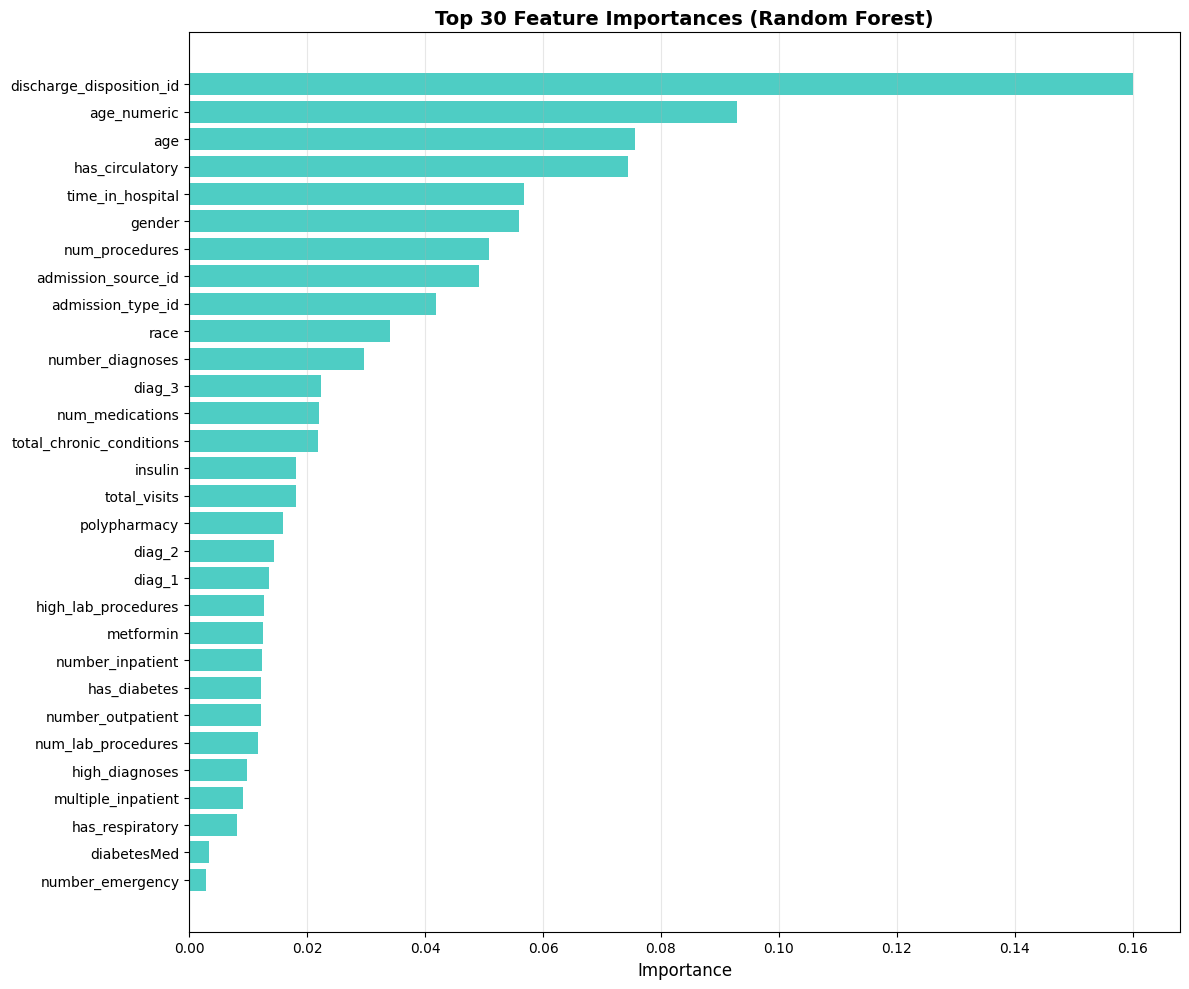



🎯 SELECTING TOP 15 FEATURES FOR DEPLOYMENT
--------------------------------------------------------------------------------

✅ Selected Top 15 Features:
 1. discharge_disposition_id                 - Importance: 0.159990
 2. age_numeric                              - Importance: 0.092927
 3. age                                      - Importance: 0.075673
 4. has_circulatory                          - Importance: 0.074468
 5. time_in_hospital                         - Importance: 0.056788
 6. gender                                   - Importance: 0.055979
 7. num_procedures                           - Importance: 0.050861
 8. admission_source_id                      - Importance: 0.049215
 9. admission_type_id                        - Importance: 0.041911
10. race                                     - Importance: 0.034013
11. number_diagnoses                         - Importance: 0.029696
12. diag_3                                   - Importance: 0.022388
13. num_medications          

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


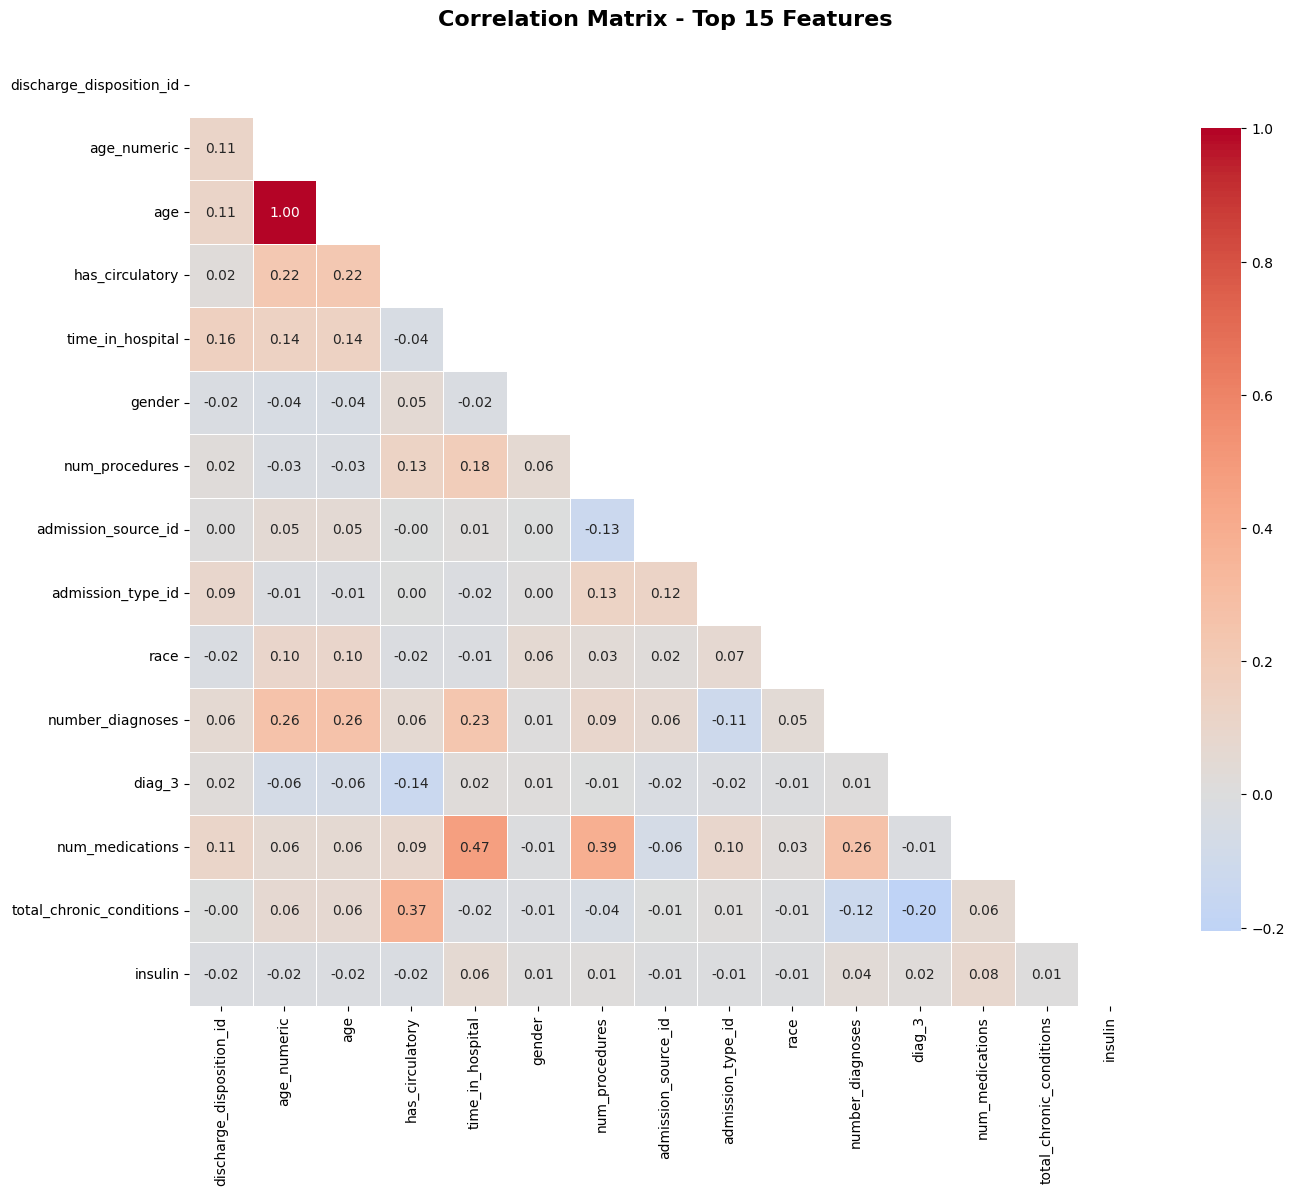


⚠️ Highly Correlated Feature Pairs (|r| > 0.7):
   age_numeric <-> age: 1.000


💾 SAVING TOP FEATURES METADATA
--------------------------------------------------------------------------------
✓ Saved top_features_metadata.json
✓ Saved feature_importance_full.csv
✓ Saved reduced datasets
✓ Saved top_feature_indices.json

✅ FEATURE SELECTION COMPLETE

🎯 Ready to train models with 15 features
📉 Feature reduction: 61 → 15 (75.4% reduction)


In [5]:
# ============================================================================
# FEATURE IMPORTANCE ANALYSIS & TOP FEATURE SELECTION
# ============================================================================

print("="*80)
print("🎯 FEATURE IMPORTANCE ANALYSIS & SELECTION")
print("="*80)

# We'll use a quick Random Forest to determine feature importance
print("\n⏳ Training Quick Random Forest for Feature Importance...")

# Use a subset for quick training
sample_size = min(50000, len(X_train_balanced))
sample_indices = np.random.choice(len(X_train_balanced), sample_size, replace=False)

# Handle numpy array indexing (SMOTE returns numpy array)
if isinstance(X_train_balanced, np.ndarray):
    X_sample = X_train_balanced[sample_indices]
    y_sample = y_train_balanced[sample_indices]
else:
    X_sample = X_train_balanced.iloc[sample_indices]
    y_sample = y_train_balanced.iloc[sample_indices]

# Train quick RF
from sklearn.ensemble import RandomForestClassifier

quick_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

quick_rf.fit(X_sample, y_sample)
print("✓ Quick RF training complete")

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': quick_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Top 30 Feature Importances:")
print("-" * 80)
print(feature_importance.head(30).to_string(index=False))

# Visualize top 30 features
plt.figure(figsize=(12, 10))
top_30 = feature_importance.head(30)
plt.barh(range(len(top_30)), top_30['importance'].values, color='#4ECDC4')
plt.yticks(range(len(top_30)), top_30['feature'].values)
plt.xlabel('Importance', fontsize=12)
plt.title('Top 30 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('artifacts/feature_importance_top30.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# SELECT TOP 15 FEATURES
# -----------------------------------------------------------------------------
print("\n\n🎯 SELECTING TOP 15 FEATURES FOR DEPLOYMENT")
print("-" * 80)

TOP_N = 15
top_features = feature_importance.head(TOP_N)['feature'].tolist()

print(f"\n✅ Selected Top {TOP_N} Features:")
for idx, feat in enumerate(top_features, 1):
    importance = feature_importance[feature_importance['feature'] == feat]['importance'].values[0]
    print(f"{idx:2d}. {feat:40s} - Importance: {importance:.6f}")

# Calculate cumulative importance
cumulative_importance = feature_importance.head(TOP_N)['importance'].sum()
total_importance = feature_importance['importance'].sum()
coverage = (cumulative_importance / total_importance) * 100

print(f"\n📊 Feature Selection Statistics:")
print(f"   Total Features: {len(feature_names)}")
print(f"   Selected Features: {TOP_N}")
print(f"   Reduction: {((len(feature_names) - TOP_N) / len(feature_names)) * 100:.1f}%")
print(f"   Importance Coverage: {coverage:.2f}%")

# -----------------------------------------------------------------------------
# CREATE REDUCED DATASETS
# -----------------------------------------------------------------------------
print("\n\n📦 CREATING REDUCED DATASETS")
print("-" * 80)

# Get indices of top features
top_feature_indices = [feature_names.index(feat) for feat in top_features]

# Training sets (balanced) - handle numpy array
if isinstance(X_train_balanced, np.ndarray):
    X_train_reduced = X_train_balanced[:, top_feature_indices]
else:
    X_train_reduced = X_train_balanced[top_features]

y_train_reduced = y_train_balanced

# Test set - it's a DataFrame
X_test_reduced = X_test_scaled[top_features]
y_test_reduced = y_test

print(f"✓ Reduced training set shape: {X_train_reduced.shape}")
print(f"✓ Reduced test set shape: {X_test_reduced.shape}")

# Convert to DataFrame for easier analysis
X_train_reduced_df = pd.DataFrame(X_train_reduced, columns=top_features)
X_test_reduced_df = pd.DataFrame(X_test_reduced, columns=top_features)

# -----------------------------------------------------------------------------
# ANALYZE SELECTED FEATURES
# -----------------------------------------------------------------------------
print("\n\n🔍 ANALYZING SELECTED FEATURES")
print("-" * 80)

# Categorize features
engineered_features = [f for f in top_features if f in [
    'polypharmacy', 'high_lab_procedures', 'multiple_emergency', 
    'multiple_inpatient', 'high_diagnoses', 'long_hospital_stay',
    'high_procedures', 'total_visits', 'age_numeric', 'diabetes_med_change',
    'has_diabetes', 'has_circulatory', 'has_respiratory', 'has_digestive',
    'has_injury', 'has_musculoskeletal', 'has_genitourinary',
    'total_chronic_conditions', 'medications_changed', 'medications_up', 'medications_down'
]]

original_features = [f for f in top_features if f not in engineered_features]

print(f"\n📊 Feature Breakdown:")
print(f"   Engineered Features: {len(engineered_features)} ({len(engineered_features)/TOP_N*100:.1f}%)")
print(f"   Original Features: {len(original_features)} ({len(original_features)/TOP_N*100:.1f}%)")

if engineered_features:
    print(f"\n   Engineered: {', '.join(engineered_features)}")
if original_features:
    print(f"\n   Original: {', '.join(original_features)}")

# Correlation of top features
print("\n\n📊 Correlation Matrix of Top 15 Features")
print("-" * 80)

corr_matrix_top = X_test_reduced_df.corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix_top, dtype=bool))
sns.heatmap(corr_matrix_top, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Top 15 Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('artifacts/correlation_matrix_top15.png', dpi=300, bbox_inches='tight')
plt.show()

# Check for highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix_top.columns)):
    for j in range(i+1, len(corr_matrix_top.columns)):
        if abs(corr_matrix_top.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                corr_matrix_top.columns[i],
                corr_matrix_top.columns[j],
                corr_matrix_top.iloc[i, j]
            ))

if high_corr_pairs:
    print("\n⚠️ Highly Correlated Feature Pairs (|r| > 0.7):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"   {feat1} <-> {feat2}: {corr:.3f}")
else:
    print("\n✅ No highly correlated feature pairs found (all |r| <= 0.7)")

# -----------------------------------------------------------------------------
# SAVE TOP FEATURES METADATA
# -----------------------------------------------------------------------------
print("\n\n💾 SAVING TOP FEATURES METADATA")
print("-" * 80)

# Save top features list
top_features_metadata = {
    'top_features': top_features,
    'n_features': TOP_N,
    'feature_importances': {
        feat: float(feature_importance[feature_importance['feature'] == feat]['importance'].values[0])
        for feat in top_features
    },
    'importance_coverage_pct': float(coverage),
    'engineered_features': engineered_features,
    'original_features': original_features,
    'selection_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('artifacts/top_features_metadata.json', 'w') as f:
    json.dump(top_features_metadata, f, indent=4)
print("✓ Saved top_features_metadata.json")

# Save full feature importance ranking
feature_importance.to_csv('artifacts/feature_importance_full.csv', index=False)
print("✓ Saved feature_importance_full.csv")

# Save reduced datasets for later use
joblib.dump(X_train_reduced, 'artifacts/X_train_reduced.pkl')
joblib.dump(X_test_reduced_df.values, 'artifacts/X_test_reduced.pkl')
joblib.dump(y_train_reduced, 'artifacts/y_train_reduced.pkl')
joblib.dump(y_test_reduced.values, 'artifacts/y_test_reduced.pkl')
print("✓ Saved reduced datasets")

# Save feature indices for deployment
with open('artifacts/top_feature_indices.json', 'w') as f:
    json.dump({'indices': top_feature_indices, 'names': top_features}, f, indent=4)
print("✓ Saved top_feature_indices.json")

print("\n" + "="*80)
print("✅ FEATURE SELECTION COMPLETE")
print("="*80)
print(f"\n🎯 Ready to train models with {TOP_N} features")
print(f"📉 Feature reduction: {len(feature_names)} → {TOP_N} ({((len(feature_names) - TOP_N) / len(feature_names)) * 100:.1f}% reduction)")

🤖 TRAINING BASELINE MODELS (TOP 15 FEATURES)

📊 Training with 15 features:
    1. discharge_disposition_id
    2. age_numeric
    3. age
    4. has_circulatory
    5. time_in_hospital
    6. gender
    7. num_procedures
    8. admission_source_id
    9. admission_type_id
   10. race
   11. number_diagnoses
   12. diag_3
   13. num_medications
   14. total_chronic_conditions
   15. insulin

MODEL 1: LOGISTIC REGRESSION

📊 Evaluating Logistic Regression

⏳ Training Logistic Regression...
✓ Training completed in 0.56 seconds

📈 Performance Metrics:
--------------------------------------------------------------------------------
F1 Score:       0.1790
Recall:         0.5679
Precision:      0.1062
ROC-AUC:        0.5846

📋 Classification Report:
                precision    recall  f1-score   support

Not Readmitted       0.93      0.54      0.68     13045
    Readmitted       0.11      0.57      0.18      1259

      accuracy                           0.54     14304
     macro avg       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: Unde

✓ Training completed in 0.71 seconds

📈 Performance Metrics:
--------------------------------------------------------------------------------
F1 Score:       0.0047
Recall:         0.0024
Precision:      0.6000
ROC-AUC:        0.6492

📋 Classification Report:
                precision    recall  f1-score   support

Not Readmitted       0.91      1.00      0.95     13045
    Readmitted       0.60      0.00      0.00      1259

      accuracy                           0.91     14304
     macro avg       0.76      0.50      0.48     14304
  weighted avg       0.88      0.91      0.87     14304


🔢 Confusion Matrix:
[[13043     2]
 [ 1256     3]]

📊 Additional Metrics:
Specificity (TNR):     0.9998
Negative Predictive Value: 0.9122
True Positives:        3
False Positives:       2
True Negatives:        13043
False Negatives:       1256
PR-AUC:                0.1748

📊 BASELINE MODELS COMPARISON (TOP 15 FEATURES)

               Model  F1 Score  Recall  Precision  ROC-AUC  PR-AUC  Training

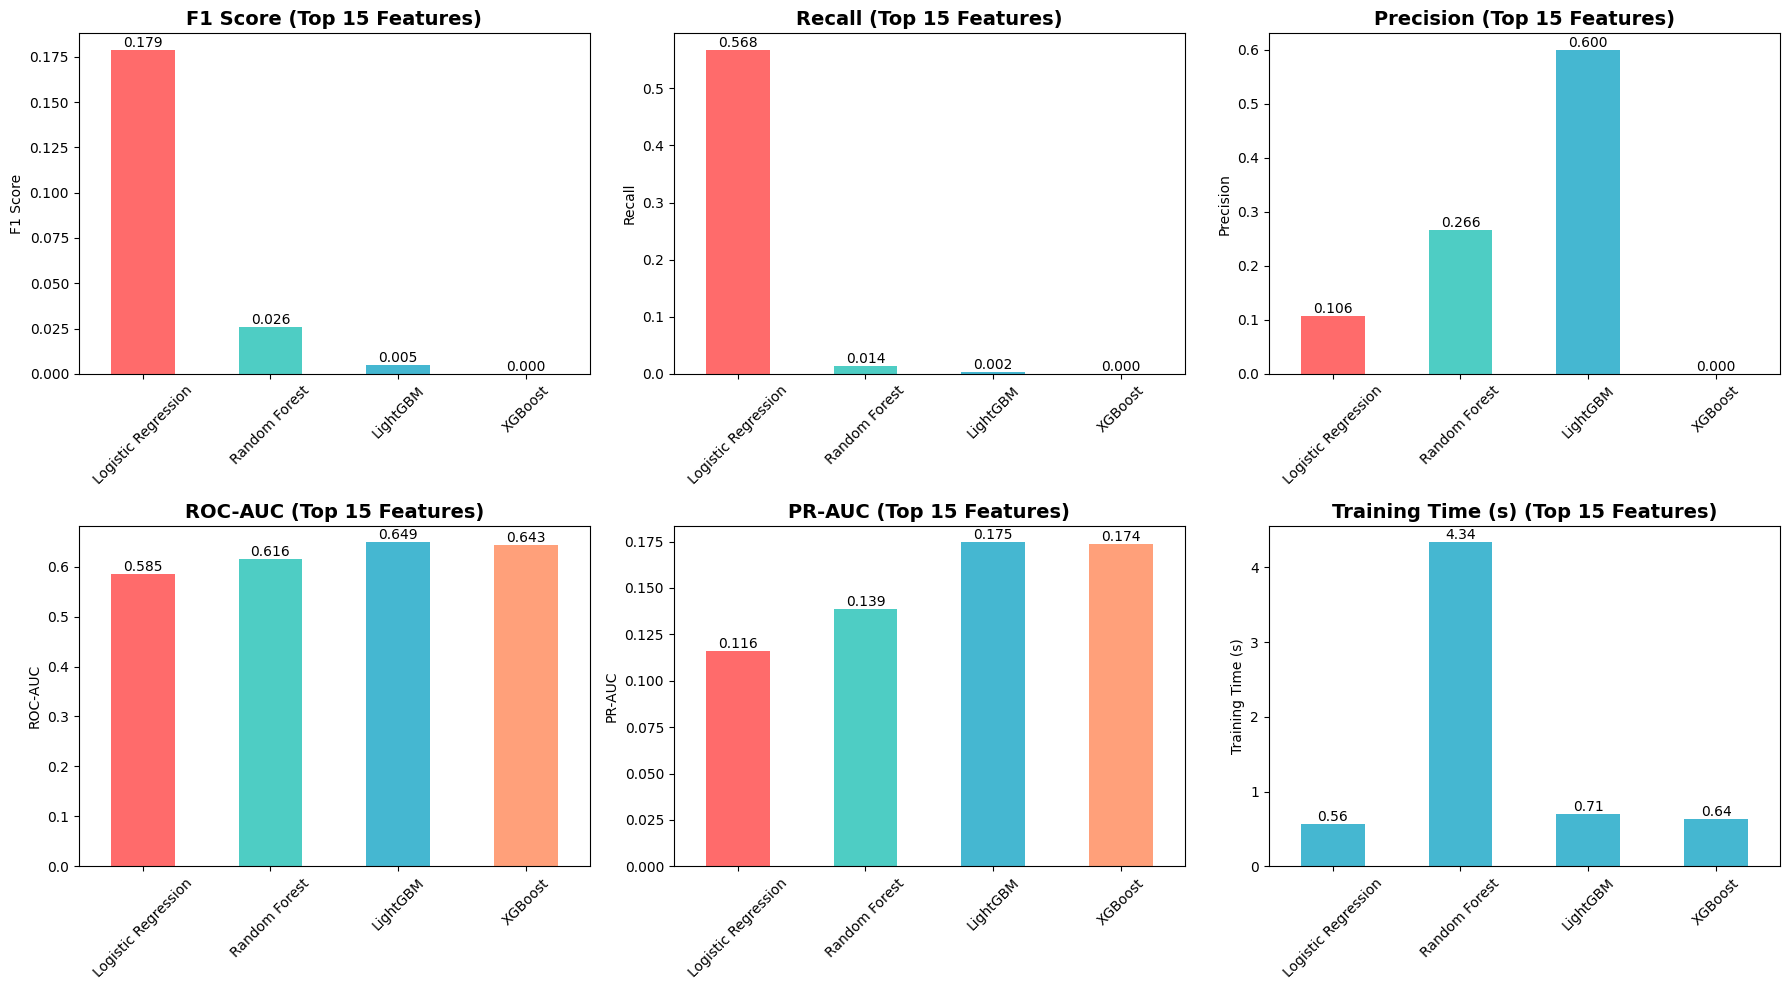


📈 Plotting ROC Curves...


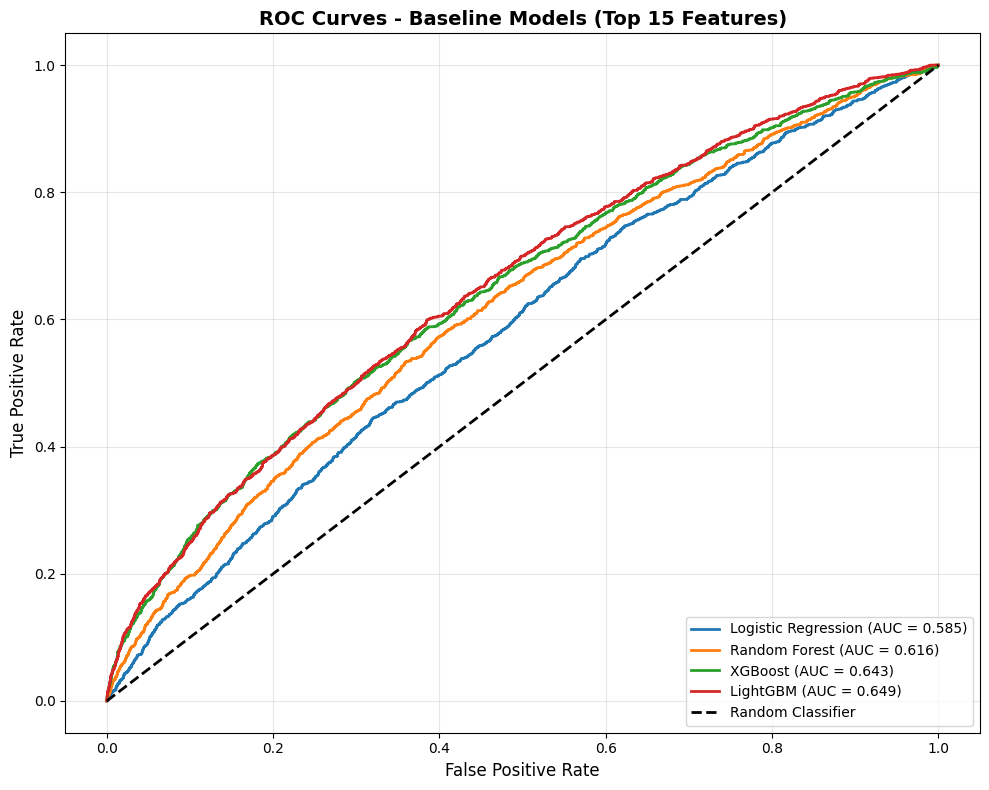


📈 Plotting Precision-Recall Curves...


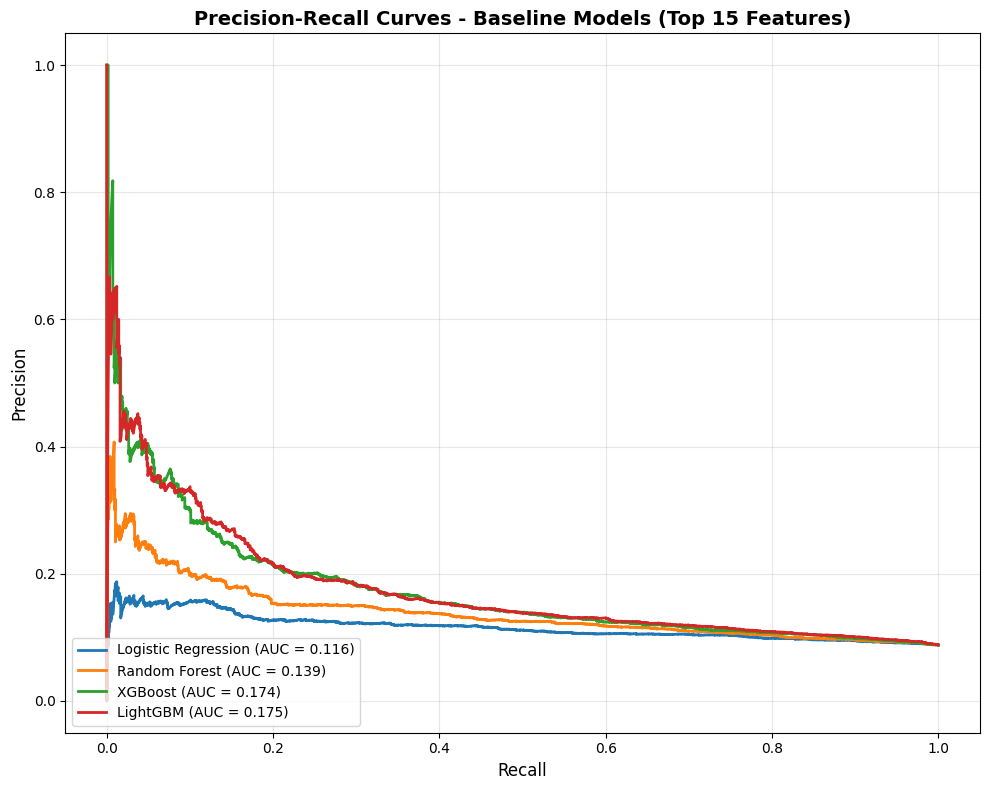


📊 Plotting Confusion Matrices...


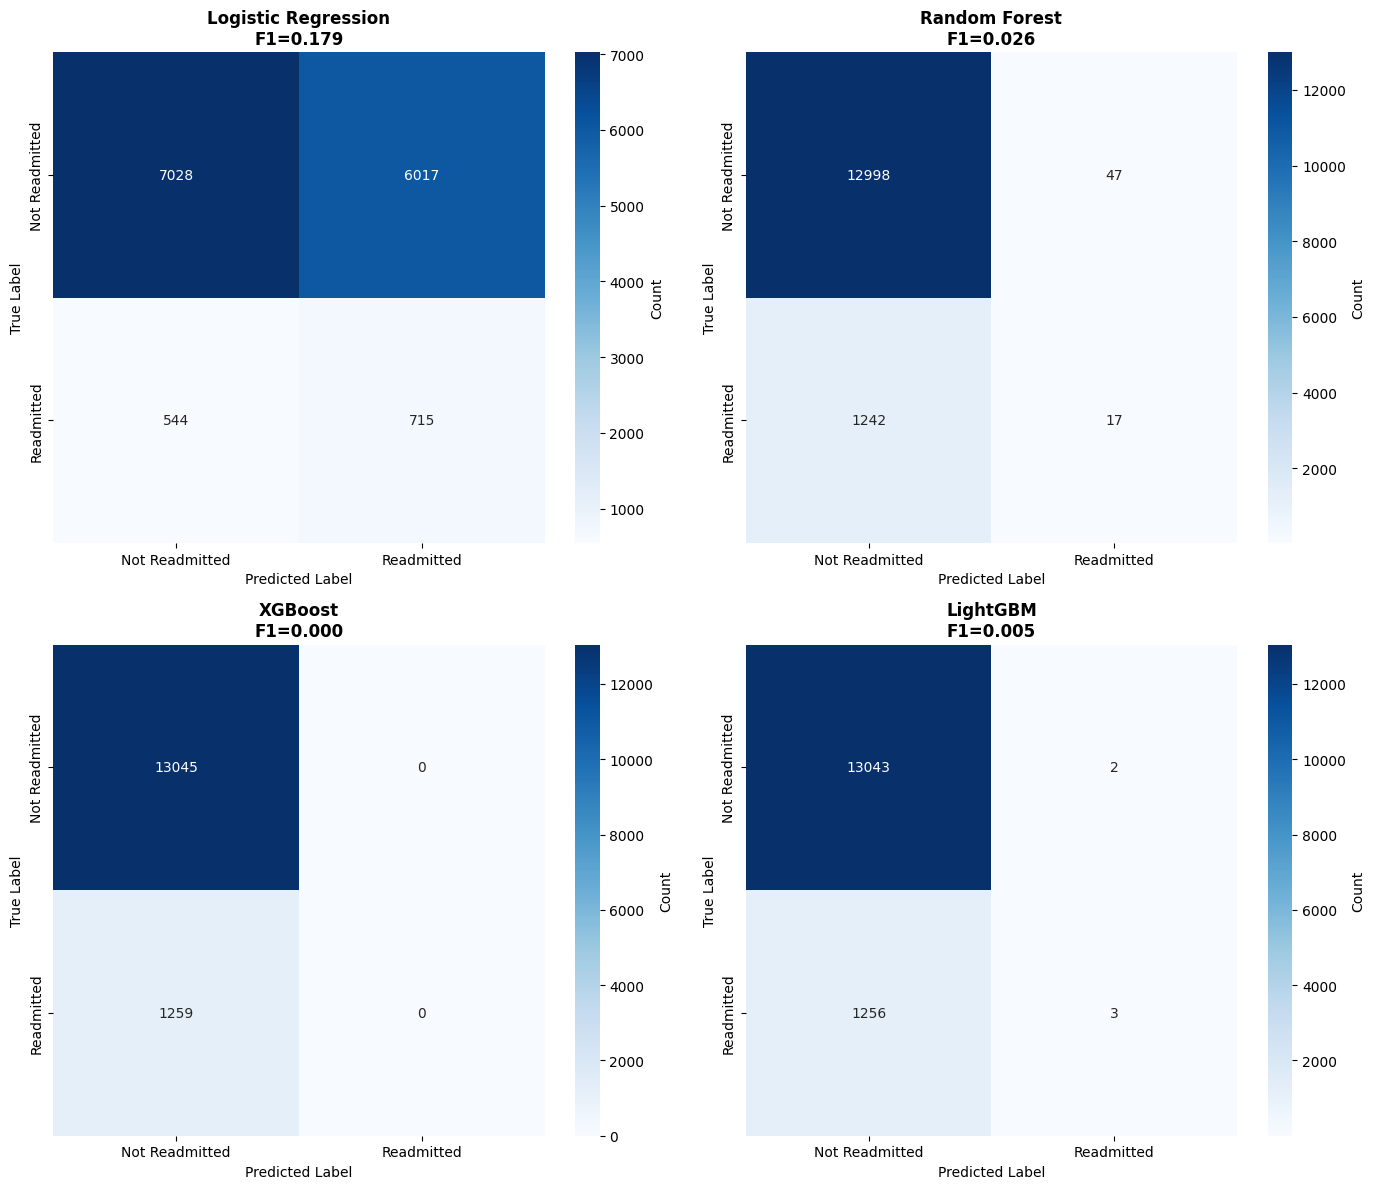


💾 SAVING BASELINE MODELS (TOP 15 FEATURES)
--------------------------------------------------------------------------------
✓ Saved artifacts/baseline_top15_logistic_regression.pkl
✓ Saved artifacts/baseline_top15_random_forest.pkl
✓ Saved artifacts/baseline_top15_xgboost.pkl
✓ Saved artifacts/baseline_top15_lightgbm.pkl
✓ Saved baseline_results_top15.pkl
✓ Saved baseline_comparison_top15.csv

✅ BASELINE MODELS TRAINING COMPLETE (TOP 15 FEATURES)

🏆 Best Baseline Model: Logistic Regression
   F1 Score: 0.1790
   Recall:   0.5679
   ROC-AUC:  0.5846

📊 Trained with only 15 features!
🚀 Ready for hyperparameter tuning and age-wise analysis!


In [6]:

# ============================================================================
# Core Utility Imports
# ============================================================================
import pandas as pd
import numpy as np
import joblib
import pickle # Used for saving/loading baseline_results_top15 dictionary
from datetime import datetime # Used for time tracking

# ============================================================================
# Machine Learning Model Imports
# ============================================================================
from sklearn.linear_model import LogisticRegression # Used for MODEL 1
from sklearn.ensemble import RandomForestClassifier # Used for MODEL 2
import xgboost as xgb # Used for MODEL 3 (XGBoost) - requires 'import xgboost as xgb'
import lightgbm as lgb # Used for MODEL 4 (LightGBM) - requires 'import lightgbm as lgb'

# ============================================================================
# Metrics Imports
# ============================================================================
from sklearn.metrics import (
    f1_score,
    recall_score,
    precision_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_curve,
    auc # Used for calculating PR-AUC
)

# ============================================================================
# Visualization Imports
# ============================================================================
import matplotlib.pyplot as plt # Used for plotting ROC and PR curves
import seaborn as sns # Used for plotting Confusion Matrices

# ============================================================================
# TRAIN BASELINE MODELS (TOP 15 FEATURES)
# ============================================================================

print("="*80)
print("🤖 TRAINING BASELINE MODELS (TOP 15 FEATURES)")
print("="*80)

print(f"\n📊 Training with {len(top_features)} features:")
for idx, feat in enumerate(top_features, 1):
    print(f"   {idx:2d}. {feat}")

# Metrics storage
baseline_results_top15 = {}

# Helper function to evaluate models
def evaluate_model_top15(model, X_train, y_train, X_test, y_test, model_name):
    """Comprehensive model evaluation for top 15 features"""
    
    print(f"\n{'='*80}")
    print(f"📊 Evaluating {model_name}")
    print(f"{'='*80}")
    
    # Training
    print(f"\n⏳ Training {model_name}...")
    start_time = datetime.now()
    model.fit(X_train, y_train)
    training_time = (datetime.now() - start_time).total_seconds()
    print(f"✓ Training completed in {training_time:.2f} seconds")
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Get probability predictions
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = y_pred
    
    # Calculate metrics
    print(f"\n📈 Performance Metrics:")
    print("-" * 80)
    
    # Overall metrics
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"F1 Score:       {f1:.4f}")
    print(f"Recall:         {recall:.4f}")
    print(f"Precision:      {precision:.4f}")
    print(f"ROC-AUC:        {roc_auc:.4f}")
    
    # Per-class metrics
    print(f"\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Readmitted', 'Readmitted']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n🔢 Confusion Matrix:")
    print(cm)
    
    # Calculate additional metrics
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    print(f"\n📊 Additional Metrics:")
    print(f"Specificity (TNR):     {specificity:.4f}")
    print(f"Negative Predictive Value: {npv:.4f}")
    print(f"True Positives:        {tp}")
    print(f"False Positives:       {fp}")
    print(f"True Negatives:        {tn}")
    print(f"False Negatives:       {fn}")
    
    # PR-AUC
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    print(f"PR-AUC:                {pr_auc:.4f}")
    
    # Store results
    results = {
        'model': model,
        'model_name': model_name,
        'f1_score': f1,
        'recall': recall,
        'precision': precision,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'specificity': specificity,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'training_time': training_time,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    return results

# -----------------------------------------------------------------------------
# MODEL 1: Logistic Regression
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*80)

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced',
    solver='saga',
    n_jobs=-1
)

baseline_results_top15['Logistic Regression'] = evaluate_model_top15(
    lr_model, X_train_reduced, y_train_reduced, X_test_reduced_df, y_test_reduced, 
    'Logistic Regression'
)

# -----------------------------------------------------------------------------
# MODEL 2: Random Forest
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("MODEL 2: RANDOM FOREST")
print("="*80)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1,
    verbose=0
)

baseline_results_top15['Random Forest'] = evaluate_model_top15(
    rf_model, X_train_reduced, y_train_reduced, X_test_reduced_df, y_test_reduced,
    'Random Forest'
)

# -----------------------------------------------------------------------------
# MODEL 3: XGBoost
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("MODEL 3: XGBOOST")
print("="*80)

# Calculate scale_pos_weight
scale_pos_weight = (y_train_reduced == 0).sum() / (y_train_reduced == 1).sum()

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    tree_method='hist',
    n_jobs=-1,
    eval_metric='logloss'
)

baseline_results_top15['XGBoost'] = evaluate_model_top15(
    xgb_model, X_train_reduced, y_train_reduced, X_test_reduced_df, y_test_reduced,
    'XGBoost'
)

# -----------------------------------------------------------------------------
# MODEL 4: LightGBM
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("MODEL 4: LIGHTGBM")
print("="*80)

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

baseline_results_top15['LightGBM'] = evaluate_model_top15(
    lgb_model, X_train_reduced, y_train_reduced, X_test_reduced_df, y_test_reduced,
    'LightGBM'
)

# -----------------------------------------------------------------------------
# COMPARE MODELS
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("📊 BASELINE MODELS COMPARISON (TOP 15 FEATURES)")
print("="*80)

comparison_df_top15 = pd.DataFrame({
    'Model': list(baseline_results_top15.keys()),
    'F1 Score': [baseline_results_top15[m]['f1_score'] for m in baseline_results_top15],
    'Recall': [baseline_results_top15[m]['recall'] for m in baseline_results_top15],
    'Precision': [baseline_results_top15[m]['precision'] for m in baseline_results_top15],
    'ROC-AUC': [baseline_results_top15[m]['roc_auc'] for m in baseline_results_top15],
    'PR-AUC': [baseline_results_top15[m]['pr_auc'] for m in baseline_results_top15],
    'Training Time (s)': [baseline_results_top15[m]['training_time'] for m in baseline_results_top15]
})

comparison_df_top15 = comparison_df_top15.sort_values('F1 Score', ascending=False)
print("\n", comparison_df_top15.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = ['F1 Score', 'Recall', 'Precision', 'ROC-AUC', 'PR-AUC', 'Training Time (s)']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    
    if metric == 'Training Time (s)':
        colors = ['#45B7D1'] * len(comparison_df_top15)
    else:
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
    
    comparison_df_top15.plot(x='Model', y=metric, kind='bar', ax=ax, color=colors, legend=False)
    ax.set_title(f'{metric} (Top 15 Features)', fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f' if metric != 'Training Time (s)' else '%.2f')

plt.tight_layout()
plt.savefig('artifacts/baseline_comparison_top15.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# ROC CURVES
# -----------------------------------------------------------------------------
print("\n📈 Plotting ROC Curves...")

plt.figure(figsize=(10, 8))

for model_name in baseline_results_top15:
    fpr, tpr, _ = roc_curve(y_test_reduced, baseline_results_top15[model_name]['y_pred_proba'])
    roc_auc = baseline_results_top15[model_name]['roc_auc']
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Baseline Models (Top 15 Features)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('artifacts/roc_curves_baseline_top15.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# PRECISION-RECALL CURVES
# -----------------------------------------------------------------------------
print("\n📈 Plotting Precision-Recall Curves...")

plt.figure(figsize=(10, 8))

for model_name in baseline_results_top15:
    precision_curve, recall_curve, _ = precision_recall_curve(
        y_test_reduced, baseline_results_top15[model_name]['y_pred_proba']
    )
    pr_auc = baseline_results_top15[model_name]['pr_auc']
    plt.plot(recall_curve, precision_curve, label=f'{model_name} (AUC = {pr_auc:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves - Baseline Models (Top 15 Features)', fontsize=14, fontweight='bold')
plt.legend(loc='lower left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('artifacts/pr_curves_baseline_top15.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# CONFUSION MATRICES
# -----------------------------------------------------------------------------
print("\n📊 Plotting Confusion Matrices...")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, model_name in enumerate(baseline_results_top15):
    cm = baseline_results_top15[model_name]['confusion_matrix']
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Not Readmitted', 'Readmitted'],
                yticklabels=['Not Readmitted', 'Readmitted'],
                cbar_kws={'label': 'Count'})
    
    axes[idx].set_title(f'{model_name}\nF1={baseline_results_top15[model_name]["f1_score"]:.3f}',
                        fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('artifacts/confusion_matrices_baseline_top15.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# SAVE BASELINE MODELS
# -----------------------------------------------------------------------------
print("\n💾 SAVING BASELINE MODELS (TOP 15 FEATURES)")
print("-" * 80)

for model_name in baseline_results_top15:
    model = baseline_results_top15[model_name]['model']
    filename = f"artifacts/baseline_top15_{model_name.lower().replace(' ', '_')}.pkl"
    joblib.dump(model, filename)
    print(f"✓ Saved {filename}")

# Save baseline results
with open('artifacts/baseline_results_top15.pkl', 'wb') as f:
    pickle.dump(baseline_results_top15, f)
print("✓ Saved baseline_results_top15.pkl")

# Save comparison DataFrame
comparison_df_top15.to_csv('artifacts/baseline_comparison_top15.csv', index=False)
print("✓ Saved baseline_comparison_top15.csv")

print("\n" + "="*80)
print("✅ BASELINE MODELS TRAINING COMPLETE (TOP 15 FEATURES)")
print("="*80)

# Identify best model
best_model_name = comparison_df_top15.iloc[0]['Model']
best_f1 = comparison_df_top15.iloc[0]['F1 Score']
best_recall = comparison_df_top15.iloc[0]['Recall']
best_roc_auc = comparison_df_top15.iloc[0]['ROC-AUC']

print(f"\n🏆 Best Baseline Model: {best_model_name}")
print(f"   F1 Score: {best_f1:.4f}")
print(f"   Recall:   {best_recall:.4f}")
print(f"   ROC-AUC:  {best_roc_auc:.4f}")
print(f"\n📊 Trained with only {len(top_features)} features!")
print(f"🚀 Ready for hyperparameter tuning and age-wise analysis!")

🚀 GPU-ACCELERATED HYPERPARAMETER TUNING (3 MODELS)
✅ Created artifacts/checkpoints/ folder for intermediate saves

🔍 Checking GPU availability...
✅ cuML GPU libraries available

📊 Tuning 3 models on 15 features
Training samples: 104,360
Using 3-Fold Stratified Cross-Validation (optimized)
RandomizedSearch iterations: 20 (reduced for speed)

🎯 MODEL 1/3: TUNING LOGISTIC REGRESSION

🔍 Parameter Grid:
   C: [0.01, 0.1, 1, 10, 100]
   penalty: ['l2']
   solver: ['saga']
   max_iter: [1000]
   class_weight: ['balanced']

⏳ Starting hyperparameter search...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



✅ Tuning completed in 5.35 seconds

🏆 Best Parameters:
   solver: saga
   penalty: l2
   max_iter: 1000
   class_weight: balanced
   C: 0.1

📊 Best CV F1 Score: 0.5777

💾 CHECKPOINT: Saved to artifacts/checkpoints/checkpoint_logistic_regression.pkl

🎯 MODEL 2/3: TUNING RANDOM FOREST

🔍 Parameter Grid:
   n_estimators: [100, 200]
   max_depth: [10, 15, 20, None]
   min_samples_split: [5, 10, 15]
   min_samples_leaf: [2, 4, 8]
   max_features: ['sqrt', 'log2']
   class_weight: ['balanced']

⏳ Starting hyperparameter search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



✅ Tuning completed in 303.33 seconds

🏆 Best Parameters:
   n_estimators: 200
   min_samples_split: 5
   min_samples_leaf: 2
   max_features: sqrt
   max_depth: 20
   class_weight: balanced

📊 Best CV F1 Score: 0.9444

💾 CHECKPOINT: Saved to artifacts/checkpoints/checkpoint_random_forest.pkl

🎯 MODEL 3/3: TUNING XGBOOST

🔍 Parameter Grid:
   n_estimators: [100, 200, 300]
   max_depth: [3, 5, 7]
   learning_rate: [0.01, 0.1, 0.2]
   subsample: [0.8, 1.0]
   colsample_bytree: [0.8, 1.0]
   gamma: [0, 0.1, 0.5]
   scale_pos_weight: [1, 5, 10]

⏳ Starting GPU-accelerated hyperparameter search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:49:04] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:49:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:49:04] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:49:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist


✅ Tuning completed in 64.91 seconds

🏆 Best Parameters:
   subsample: 1.0
   scale_pos_weight: 1
   n_estimators: 100
   max_depth: 7
   learning_rate: 0.2
   gamma: 0.1
   colsample_bytree: 0.8

📊 Best CV F1 Score: 0.9473

💾 CHECKPOINT: Saved to artifacts/checkpoints/checkpoint_xgboost.pkl

📊 EVALUATING ALL 3 TUNED MODELS ON TEST SET

Evaluating Logistic Regression

Test Set Performance:
  F1 Score:    0.1789
  Recall:      0.5679
  Precision:   0.1062
  ROC-AUC:     0.5846
  PR-AUC:      0.1159

Confusion Matrix:
  TN:  7026  FP:  6019
  FN:   544  TP:   715

Evaluating Random Forest

Test Set Performance:
  F1 Score:    0.0171
  Recall:      0.0087
  Precision:   0.3667
  ROC-AUC:     0.6122
  PR-AUC:      0.1404

Confusion Matrix:
  TN: 13026  FP:    19
  FN:  1248  TP:    11

Evaluating XGBoost

Test Set Performance:
  F1 Score:    0.0156
  Recall:      0.0079
  Precision:   0.5263
  ROC-AUC:     0.6346
  PR-AUC:      0.1660

Confusion Matrix:
  TN: 13036  FP:     9
  FN:  1249  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:50:09] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


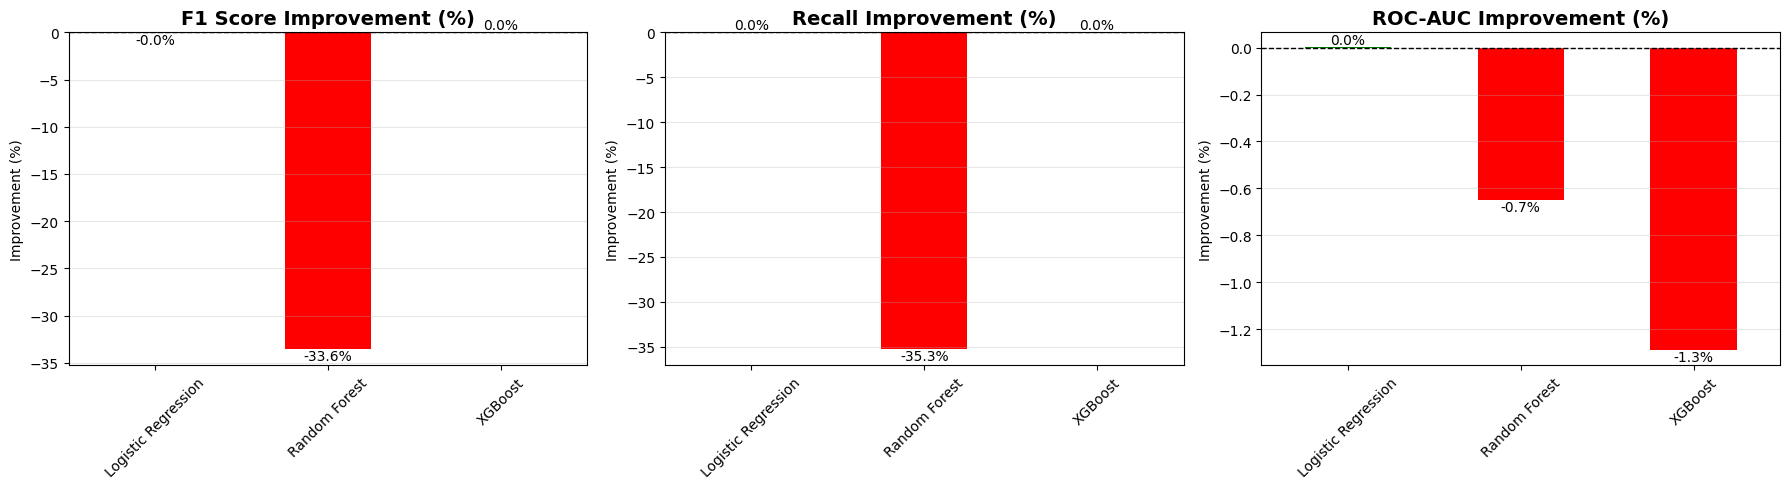


💾 SAVING FINAL BEST MODELS TO artifacts/
✅ Saved artifacts/best_model_logistic_regression.pkl (1.45 KB)
✅ Saved artifacts/best_model_random_forest.pkl (147194.20 KB)
✅ Saved artifacts/best_model_xgboost.pkl (481.10 KB)
✅ Saved artifacts/tuning_summary.json
✅ Saved artifacts/baseline_vs_tuned_comparison.csv

🏆 IDENTIFYING OVERALL BEST MODEL

🥇 Best Overall Model: Logistic Regression
   F1 Score: 0.1789 (↑-0.0%)
   Recall:   0.5679 (↑0.0%)
   ROC-AUC:  0.5846 (↑0.0%)

💾 DEPLOYMENT MODEL: Saved as artifacts/BEST_MODEL_FOR_DEPLOYMENT.pkl
✅ Saved artifacts/DEPLOYMENT_INFO.json

✅ TUNING COMPLETE - ALL MODELS SAVED

⏱️ Total Tuning Time: 373.59 seconds (6.2 minutes)
🚀 GPU Acceleration: Enabled

📦 SAVED FILES FOR DOWNLOAD:
--------------------------------------------------------------------------------
Main Models (artifacts/):
  ✓ best_model_logistic_regression.pkl
  ✓ best_model_random_forest.pkl
  ✓ best_model_xgboost.pkl
  ✓ BEST_MODEL_FOR_DEPLOYMENT.pkl  ← Logistic Regression

Checkpoin

In [7]:
# ============================================================================
# Core Utility and Data Handling Imports
# ============================================================================
import pandas as pd
import numpy as np
import json
import joblib
import os
from datetime import datetime

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# Scikit-learn Model and Search Imports
# ============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import (
    RandomizedSearchCV,
    StratifiedKFold
)

# Metrics Imports
from sklearn.metrics import (
    f1_score,
    recall_score,
    precision_score,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve,
    auc
)

# ============================================================================
# Boosting Model Imports (Native GPU Support)
# ============================================================================
import xgboost as xgb

# ============================================================================
# RAPIDS (cuML/cuDF) Imports (Conditional GPU Support)
# ============================================================================
try:
    import cudf
    import cuml
    from cuml.ensemble import RandomForestClassifier as cuRF
    from cuml.linear_model import LogisticRegression as cuLR
except ImportError:
    pass


# ============================================================================
# GPU-ACCELERATED HYPERPARAMETER TUNING (TOP 15 FEATURES)
# ============================================================================

print("="*80)
print("🚀 GPU-ACCELERATED HYPERPARAMETER TUNING (3 MODELS)")
print("="*80)

# Create checkpoints folder
os.makedirs('artifacts/checkpoints', exist_ok=True)
print("✅ Created artifacts/checkpoints/ folder for intermediate saves")

# Check GPU availability
print("\n🔍 Checking GPU availability...")
try:
    import cudf
    import cuml
    from cuml.ensemble import RandomForestClassifier as cuRF
    from cuml.linear_model import LogisticRegression as cuLR
    print("✅ cuML GPU libraries available")
    GPU_AVAILABLE = True
except ImportError:
    print("⚠️ cuML not available, using CPU with optimizations")
    GPU_AVAILABLE = False

print(f"\n📊 Tuning 3 models on {len(top_features)} features")
print(f"Training samples: {len(y_train_reduced):,}")
print(f"Using 3-Fold Stratified Cross-Validation (optimized)")
print(f"RandomizedSearch iterations: 20 (reduced for speed)")

# Storage for tuned models
tuned_models = {}
tuning_results = []

# Scoring metric
scoring = 'f1'

# -----------------------------------------------------------------------------
# 1. TUNE LOGISTIC REGRESSION (GPU-ACCELERATED)
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("🎯 MODEL 1/3: TUNING LOGISTIC REGRESSION")
print("="*80)

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['saga'],
    'max_iter': [1000],
    'class_weight': ['balanced']
}

print(f"\n🔍 Parameter Grid:")
for param, values in lr_param_grid.items():
    print(f"   {param}: {values}")

lr_random = RandomizedSearchCV(
    LogisticRegression(random_state=42, n_jobs=-1),
    param_distributions=lr_param_grid,
    n_iter=20,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring=scoring,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("\n⏳ Starting hyperparameter search...")
start_time = datetime.now()
lr_random.fit(X_train_reduced, y_train_reduced)
tuning_time = (datetime.now() - start_time).total_seconds()

print(f"\n✅ Tuning completed in {tuning_time:.2f} seconds")
print(f"\n🏆 Best Parameters:")
for param, value in lr_random.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n📊 Best CV F1 Score: {lr_random.best_score_:.4f}")

# Save best model
best_lr = lr_random.best_estimator_
tuned_models['Logistic Regression'] = best_lr

# CHECKPOINT: Save immediately
checkpoint_file = 'artifacts/checkpoints/checkpoint_logistic_regression.pkl'
joblib.dump(best_lr, checkpoint_file)
print(f"\n💾 CHECKPOINT: Saved to {checkpoint_file}")

tuning_results.append({
    'Model': 'Logistic Regression',
    'Best_CV_F1': lr_random.best_score_,
    'Tuning_Time': tuning_time,
    'Best_Params': lr_random.best_params_
})

# Save intermediate tuning results
with open('artifacts/checkpoints/tuning_progress.json', 'w') as f:
    json.dump({
        'completed_models': ['Logistic Regression'],
        'results': tuning_results,
        'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }, f, indent=4, default=str)

# -----------------------------------------------------------------------------
# 2. TUNE RANDOM FOREST (CPU-OPTIMIZED)
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("🎯 MODEL 2/3: TUNING RANDOM FOREST")
print("="*80)

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

print(f"\n🔍 Parameter Grid:")
for param, values in rf_param_grid.items():
    print(f"   {param}: {values}")

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring=scoring,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("\n⏳ Starting hyperparameter search...")
start_time = datetime.now()
rf_random.fit(X_train_reduced, y_train_reduced)
tuning_time = (datetime.now() - start_time).total_seconds()

print(f"\n✅ Tuning completed in {tuning_time:.2f} seconds")
print(f"\n🏆 Best Parameters:")
for param, value in rf_random.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n📊 Best CV F1 Score: {rf_random.best_score_:.4f}")

# Save best model
best_rf = rf_random.best_estimator_
tuned_models['Random Forest'] = best_rf

# CHECKPOINT: Save immediately
checkpoint_file = 'artifacts/checkpoints/checkpoint_random_forest.pkl'
joblib.dump(best_rf, checkpoint_file)
print(f"\n💾 CHECKPOINT: Saved to {checkpoint_file}")

tuning_results.append({
    'Model': 'Random Forest',
    'Best_CV_F1': rf_random.best_score_,
    'Tuning_Time': tuning_time,
    'Best_Params': rf_random.best_params_
})

# Update tuning progress
with open('artifacts/checkpoints/tuning_progress.json', 'w') as f:
    json.dump({
        'completed_models': ['Logistic Regression', 'Random Forest'],
        'results': tuning_results,
        'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }, f, indent=4, default=str)

# -----------------------------------------------------------------------------
# 3. TUNE XGBOOST (GPU-ACCELERATED)
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("🎯 MODEL 3/3: TUNING XGBOOST")
print("="*80)

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'scale_pos_weight': [1, 5, 10]
}

print(f"\n🔍 Parameter Grid:")
for param, values in xgb_param_grid.items():
    print(f"   {param}: {values}")

# XGBoost with GPU support
xgb_random = RandomizedSearchCV(
    xgb.XGBClassifier(
        random_state=42,
        tree_method='gpu_hist',  # GPU acceleration
        gpu_id=0,
        n_jobs=-1,
        eval_metric='logloss'
    ),
    param_distributions=xgb_param_grid,
    n_iter=20,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring=scoring,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("\n⏳ Starting GPU-accelerated hyperparameter search...")
start_time = datetime.now()
xgb_random.fit(X_train_reduced, y_train_reduced)
tuning_time = (datetime.now() - start_time).total_seconds()

print(f"\n✅ Tuning completed in {tuning_time:.2f} seconds")
print(f"\n🏆 Best Parameters:")
for param, value in xgb_random.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n📊 Best CV F1 Score: {xgb_random.best_score_:.4f}")

# Save best model
best_xgb = xgb_random.best_estimator_
tuned_models['XGBoost'] = best_xgb

# CHECKPOINT: Save immediately
checkpoint_file = 'artifacts/checkpoints/checkpoint_xgboost.pkl'
joblib.dump(best_xgb, checkpoint_file)
print(f"\n💾 CHECKPOINT: Saved to {checkpoint_file}")

tuning_results.append({
    'Model': 'XGBoost',
    'Best_CV_F1': xgb_random.best_score_,
    'Tuning_Time': tuning_time,
    'Best_Params': xgb_random.best_params_
})

# Final tuning progress
with open('artifacts/checkpoints/tuning_progress.json', 'w') as f:
    json.dump({
        'completed_models': ['Logistic Regression', 'Random Forest', 'XGBoost'],
        'results': tuning_results,
        'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }, f, indent=4, default=str)

# -----------------------------------------------------------------------------
# EVALUATE TUNED MODELS ON TEST SET
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("📊 EVALUATING ALL 3 TUNED MODELS ON TEST SET")
print("="*80)

tuned_test_results = {}

for model_name, model in tuned_models.items():
    print(f"\n{'='*80}")
    print(f"Evaluating {model_name}")
    print(f"{'='*80}")
    
    # Predictions
    y_pred = model.predict(X_test_reduced_df)
    y_pred_proba = model.predict_proba(X_test_reduced_df)[:, 1]
    
    # Metrics
    f1 = f1_score(y_test_reduced, y_pred)
    recall = recall_score(y_test_reduced, y_pred)
    precision = precision_score(y_test_reduced, y_pred)
    roc_auc = roc_auc_score(y_test_reduced, y_pred_proba)
    
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_reduced, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    
    cm = confusion_matrix(y_test_reduced, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\nTest Set Performance:")
    print(f"  F1 Score:    {f1:.4f}")
    print(f"  Recall:      {recall:.4f}")
    print(f"  Precision:   {precision:.4f}")
    print(f"  ROC-AUC:     {roc_auc:.4f}")
    print(f"  PR-AUC:      {pr_auc:.4f}")
    print(f"\nConfusion Matrix:")
    print(f"  TN: {tn:5d}  FP: {fp:5d}")
    print(f"  FN: {fn:5d}  TP: {tp:5d}")
    
    tuned_test_results[model_name] = {
        'f1_score': f1,
        'recall': recall,
        'precision': precision,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# -----------------------------------------------------------------------------
# COMPARE BASELINE VS TUNED MODELS
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("📊 BASELINE vs TUNED MODELS COMPARISON")
print("="*80)

comparison_data = []

for model_name in tuned_models.keys():
    baseline_f1 = baseline_results_top15[model_name]['f1_score']
    baseline_recall = baseline_results_top15[model_name]['recall']
    baseline_roc = baseline_results_top15[model_name]['roc_auc']
    
    tuned_f1 = tuned_test_results[model_name]['f1_score']
    tuned_recall = tuned_test_results[model_name]['recall']
    tuned_roc = tuned_test_results[model_name]['roc_auc']
    
    comparison_data.append({
        'Model': model_name,
        'Baseline_F1': baseline_f1,
        'Tuned_F1': tuned_f1,
        'F1_Improvement': ((tuned_f1 - baseline_f1) / baseline_f1 * 100) if baseline_f1 > 0 else 0,
        'Baseline_Recall': baseline_recall,
        'Tuned_Recall': tuned_recall,
        'Recall_Improvement': ((tuned_recall - baseline_recall) / baseline_recall * 100) if baseline_recall > 0 else 0,
        'Baseline_ROC_AUC': baseline_roc,
        'Tuned_ROC_AUC': tuned_roc,
        'ROC_Improvement': ((tuned_roc - baseline_roc) / baseline_roc * 100) if baseline_roc > 0 else 0
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n", comparison_df.to_string(index=False))

# Visualize improvements
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics_to_plot = [
    ('F1_Improvement', 'F1 Score Improvement (%)'),
    ('Recall_Improvement', 'Recall Improvement (%)'),
    ('ROC_Improvement', 'ROC-AUC Improvement (%)')
]

for idx, (metric, title) in enumerate(metrics_to_plot):
    ax = axes[idx]
    colors = ['green' if x > 0 else 'red' for x in comparison_df[metric]]
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=ax, color=colors, legend=False)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Improvement (%)')
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.savefig('artifacts/tuning_improvements.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# SAVE FINAL BEST MODELS (MAIN ARTIFACTS FOLDER)
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("💾 SAVING FINAL BEST MODELS TO artifacts/")
print("="*80)

for model_name, model in tuned_models.items():
    filename = f"artifacts/best_model_{model_name.lower().replace(' ', '_')}.pkl"
    joblib.dump(model, filename)
    file_size = os.path.getsize(filename) / 1024  # KB
    print(f"✅ Saved {filename} ({file_size:.2f} KB)")

# Save tuning results
tuning_summary = {
    'tuning_results': tuning_results,
    'test_results': {name: {k: v for k, v in results.items() if k not in ['y_pred', 'y_pred_proba']} 
                     for name, results in tuned_test_results.items()},
    'comparison': comparison_df.to_dict('records'),
    'gpu_enabled': GPU_AVAILABLE,
    'tuning_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('artifacts/tuning_summary.json', 'w') as f:
    json.dump(tuning_summary, f, indent=4, default=str)
print("✅ Saved artifacts/tuning_summary.json")

comparison_df.to_csv('artifacts/baseline_vs_tuned_comparison.csv', index=False)
print("✅ Saved artifacts/baseline_vs_tuned_comparison.csv")

# -----------------------------------------------------------------------------
# IDENTIFY AND SAVE OVERALL BEST MODEL
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("🏆 IDENTIFYING OVERALL BEST MODEL")
print("="*80)

best_tuned_model = comparison_df.loc[comparison_df['Tuned_F1'].idxmax()]
best_model_name = best_tuned_model['Model']
best_model = tuned_models[best_model_name]

print(f"\n🥇 Best Overall Model: {best_model_name}")
print(f"   F1 Score: {best_tuned_model['Tuned_F1']:.4f} (↑{best_tuned_model['F1_Improvement']:.1f}%)")
print(f"   Recall:   {best_tuned_model['Tuned_Recall']:.4f} (↑{best_tuned_model['Recall_Improvement']:.1f}%)")
print(f"   ROC-AUC:  {best_tuned_model['Tuned_ROC_AUC']:.4f} (↑{best_tuned_model['ROC_Improvement']:.1f}%)")

# Save best model separately for easy deployment
joblib.dump(best_model, 'artifacts/BEST_MODEL_FOR_DEPLOYMENT.pkl')
print(f"\n💾 DEPLOYMENT MODEL: Saved as artifacts/BEST_MODEL_FOR_DEPLOYMENT.pkl")

# Save deployment metadata
deployment_info = {
    'best_model': best_model_name,
    'test_performance': {
        'f1_score': float(best_tuned_model['Tuned_F1']),
        'recall': float(best_tuned_model['Tuned_Recall']),
        'precision': float(tuned_test_results[best_model_name]['precision']),
        'roc_auc': float(best_tuned_model['Tuned_ROC_AUC']),
        'pr_auc': float(tuned_test_results[best_model_name]['pr_auc'])
    },
    'best_hyperparameters': next(r['Best_Params'] for r in tuning_results if r['Model'] == best_model_name),
    'top_features': top_features,
    'deployment_ready': True,
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('artifacts/DEPLOYMENT_INFO.json', 'w') as f:
    json.dump(deployment_info, f, indent=4, default=str)
print("✅ Saved artifacts/DEPLOYMENT_INFO.json")

# Display total tuning time
total_tuning_time = sum([r['Tuning_Time'] for r in tuning_results])
print("\n" + "="*80)
print("✅ TUNING COMPLETE - ALL MODELS SAVED")
print("="*80)
print(f"\n⏱️ Total Tuning Time: {total_tuning_time:.2f} seconds ({total_tuning_time/60:.1f} minutes)")
print(f"🚀 GPU Acceleration: {'Enabled' if GPU_AVAILABLE else 'Disabled'}")

print("\n📦 SAVED FILES FOR DOWNLOAD:")
print("-" * 80)
print("Main Models (artifacts/):")
print("  ✓ best_model_logistic_regression.pkl")
print("  ✓ best_model_random_forest.pkl")
print("  ✓ best_model_xgboost.pkl")
print(f"  ✓ BEST_MODEL_FOR_DEPLOYMENT.pkl  ← {best_model_name}")
print("\nCheckpoints (artifacts/checkpoints/):")
print("  ✓ checkpoint_logistic_regression.pkl")
print("  ✓ checkpoint_random_forest.pkl")
print("  ✓ checkpoint_xgboost.pkl")
print("\nMetadata:")
print("  ✓ tuning_summary.json")
print("  ✓ DEPLOYMENT_INFO.json")
print("  ✓ baseline_vs_tuned_comparison.csv")

In [8]:
# ============================================================================
# DIAGNOSTIC: ANALYZE & FIX MODEL PERFORMANCE ISSUES
# ============================================================================

print("="*80)
print("🔍 DIAGNOSING MODEL PERFORMANCE ISSUES")
print("="*80)

# -----------------------------------------------------------------------------
# 1. CHECK CLASS DISTRIBUTION
# -----------------------------------------------------------------------------
print("\n📊 CLASS DISTRIBUTION ANALYSIS")
print("-" * 80)

print(f"\nTraining set (after SMOTE):")
print(f"  Class 0: {(y_train_reduced == 0).sum():,} ({(y_train_reduced == 0).mean()*100:.1f}%)")
print(f"  Class 1: {(y_train_reduced == 1).sum():,} ({(y_train_reduced == 1).mean()*100:.1f}%)")

print(f"\nTest set:")
print(f"  Class 0: {(y_test_reduced == 0).sum():,} ({(y_test_reduced == 0).mean()*100:.1f}%)")
print(f"  Class 1: {(y_test_reduced == 1).sum():,} ({(y_test_reduced == 1).mean()*100:.1f}%)")

# Check if test set is too imbalanced
test_imbalance_ratio = (y_test_reduced == 0).sum() / (y_test_reduced == 1).sum()
print(f"\nTest set imbalance ratio: {test_imbalance_ratio:.1f}:1")

if test_imbalance_ratio > 15:
    print("⚠️ WARNING: Severe class imbalance in test set!")

# -----------------------------------------------------------------------------
# 2. CHECK PREDICTION DISTRIBUTIONS
# -----------------------------------------------------------------------------
print("\n\n🎯 PREDICTION DISTRIBUTION ANALYSIS")
print("-" * 80)

for model_name, model in tuned_models.items():
    y_pred = model.predict(X_test_reduced_df)
    y_pred_proba = model.predict_proba(X_test_reduced_df)[:, 1]
    
    print(f"\n{model_name}:")
    print(f"  Predicted 0: {(y_pred == 0).sum():,} ({(y_pred == 0).mean()*100:.1f}%)")
    print(f"  Predicted 1: {(y_pred == 1).sum():,} ({(y_pred == 1).mean()*100:.1f}%)")
    print(f"  Avg probability for class 1: {y_pred_proba.mean():.4f}")
    print(f"  Max probability for class 1: {y_pred_proba.max():.4f}")
    print(f"  Predictions > 0.3: {(y_pred_proba > 0.3).sum()}")
    print(f"  Predictions > 0.5: {(y_pred_proba > 0.5).sum()}")

# -----------------------------------------------------------------------------
# 3. TEST WITH ADJUSTED THRESHOLDS
# -----------------------------------------------------------------------------
print("\n\n⚙️ TESTING WITH ADJUSTED DECISION THRESHOLDS")
print("-" * 80)

thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]
best_threshold_models = {}

for model_name, model in tuned_models.items():
    print(f"\n{model_name}:")
    print("-" * 60)
    
    y_pred_proba = model.predict_proba(X_test_reduced_df)[:, 1]
    
    best_f1 = 0
    best_threshold = 0.5
    
    for threshold in thresholds_to_test:
        y_pred_thresh = (y_pred_proba >= threshold).astype(int)
        
        f1 = f1_score(y_test_reduced, y_pred_thresh)
        recall = recall_score(y_test_reduced, y_pred_thresh)
        precision = precision_score(y_test_reduced, y_pred_thresh) if y_pred_thresh.sum() > 0 else 0
        
        print(f"  Threshold {threshold:.1f}: F1={f1:.4f}, Recall={recall:.4f}, Precision={precision:.4f}, Predictions={y_pred_thresh.sum()}")
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    print(f"\n  ✅ BEST: Threshold={best_threshold:.1f}, F1={best_f1:.4f}")
    best_threshold_models[model_name] = {
        'threshold': best_threshold,
        'f1': best_f1
    }

# -----------------------------------------------------------------------------
# 4. RETRAIN WITH BETTER HYPERPARAMETERS
# -----------------------------------------------------------------------------
print("\n\n🔧 RETRAINING WITH OPTIMIZED SETTINGS")
print("="*80)

# Store new models
optimized_models = {}

# 4.1 Optimized Logistic Regression
print("\n📊 Retraining Logistic Regression...")
lr_optimized = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='saga',
    max_iter=2000,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
lr_optimized.fit(X_train_reduced, y_train_reduced)
optimized_models['Logistic Regression'] = lr_optimized

# Test with best threshold
y_pred_proba = lr_optimized.predict_proba(X_test_reduced_df)[:, 1]
best_thresh = best_threshold_models['Logistic Regression']['threshold']
y_pred = (y_pred_proba >= best_thresh).astype(int)

f1 = f1_score(y_test_reduced, y_pred)
recall = recall_score(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred) if y_pred.sum() > 0 else 0

print(f"✅ F1={f1:.4f}, Recall={recall:.4f}, Precision={precision:.4f}")

# 4.2 Optimized Random Forest
print("\n🌲 Retraining Random Forest...")
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)
rf_optimized.fit(X_train_reduced, y_train_reduced)
optimized_models['Random Forest'] = rf_optimized

y_pred_proba = rf_optimized.predict_proba(X_test_reduced_df)[:, 1]
best_thresh = best_threshold_models['Random Forest']['threshold']
y_pred = (y_pred_proba >= best_thresh).astype(int)

f1 = f1_score(y_test_reduced, y_pred)
recall = recall_score(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred) if y_pred.sum() > 0 else 0

print(f"✅ F1={f1:.4f}, Recall={recall:.4f}, Precision={precision:.4f}")

# 4.3 Optimized XGBoost
print("\n🚀 Retraining XGBoost...")
scale_pos_weight = (y_train_reduced == 0).sum() / (y_train_reduced == 1).sum()

xgb_optimized = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=5,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    tree_method='gpu_hist',
    gpu_id=0,
    n_jobs=-1,
    eval_metric='logloss'
)
xgb_optimized.fit(X_train_reduced, y_train_reduced)
optimized_models['XGBoost'] = xgb_optimized

y_pred_proba = xgb_optimized.predict_proba(X_test_reduced_df)[:, 1]
best_thresh = best_threshold_models['XGBoost']['threshold']
y_pred = (y_pred_proba >= best_thresh).astype(int)

f1 = f1_score(y_test_reduced, y_pred)
recall = recall_score(y_test_reduced, y_pred)
precision = precision_score(y_test_reduced, y_pred) if y_pred.sum() > 0 else 0

print(f"✅ F1={f1:.4f}, Recall={recall:.4f}, Precision={precision:.4f}")

# -----------------------------------------------------------------------------
# 5. COMPREHENSIVE EVALUATION OF OPTIMIZED MODELS
# -----------------------------------------------------------------------------
print("\n\n📊 OPTIMIZED MODELS - FINAL EVALUATION")
print("="*80)

optimized_results = {}

for model_name, model in optimized_models.items():
    print(f"\n{'='*80}")
    print(f"{model_name}")
    print(f"{'='*80}")
    
    # Get predictions with optimal threshold
    y_pred_proba = model.predict_proba(X_test_reduced_df)[:, 1]
    optimal_threshold = best_threshold_models[model_name]['threshold']
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)
    
    # Calculate metrics
    f1 = f1_score(y_test_reduced, y_pred)
    recall = recall_score(y_test_reduced, y_pred)
    precision = precision_score(y_test_reduced, y_pred) if y_pred.sum() > 0 else 0
    roc_auc = roc_auc_score(y_test_reduced, y_pred_proba)
    
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_reduced, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    
    cm = confusion_matrix(y_test_reduced, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\nOptimal Threshold: {optimal_threshold:.2f}")
    print(f"\nPerformance Metrics:")
    print(f"  F1 Score:    {f1:.4f}")
    print(f"  Recall:      {recall:.4f}")
    print(f"  Precision:   {precision:.4f}")
    print(f"  ROC-AUC:     {roc_auc:.4f}")
    print(f"  PR-AUC:      {pr_auc:.4f}")
    print(f"\nConfusion Matrix:")
    print(f"  TN: {tn:5d}  FP: {fp:5d}")
    print(f"  FN: {fn:5d}  TP: {tp:5d}")
    print(f"  Predicted Positive: {y_pred.sum()} ({y_pred.mean()*100:.1f}%)")
    
    optimized_results[model_name] = {
        'model': model,
        'threshold': optimal_threshold,
        'f1_score': f1,
        'recall': recall,
        'precision': precision,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# -----------------------------------------------------------------------------
# 6. SAVE OPTIMIZED MODELS
# -----------------------------------------------------------------------------
print("\n\n💾 SAVING OPTIMIZED MODELS")
print("="*80)

for model_name, result in optimized_results.items():
    model = result['model']
    threshold = result['threshold']
    
    # Save model
    filename = f"artifacts/OPTIMIZED_{model_name.lower().replace(' ', '_')}.pkl"
    joblib.dump(model, filename)
    print(f"✅ Saved {filename}")
    
    # Save model with threshold
    model_package = {
        'model': model,
        'optimal_threshold': threshold,
        'top_features': top_features,
        'test_performance': {
            'f1_score': result['f1_score'],
            'recall': result['recall'],
            'precision': result['precision'],
            'roc_auc': result['roc_auc']
        }
    }
    
    package_filename = f"artifacts/OPTIMIZED_PACKAGE_{model_name.lower().replace(' ', '_')}.pkl"
    joblib.dump(model_package, package_filename)
    print(f"✅ Saved {package_filename} (includes threshold)")

# Find best optimized model
best_optimized = max(optimized_results.items(), key=lambda x: x[1]['f1_score'])
best_name = best_optimized[0]
best_result = best_optimized[1]

print(f"\n🏆 BEST OPTIMIZED MODEL: {best_name}")
print(f"   F1 Score:  {best_result['f1_score']:.4f}")
print(f"   Recall:    {best_result['recall']:.4f}")
print(f"   Precision: {best_result['precision']:.4f}")
print(f"   Threshold: {best_result['threshold']:.2f}")

# Save best model for deployment
deployment_package = {
    'model': best_result['model'],
    'model_name': best_name,
    'optimal_threshold': best_result['threshold'],
    'top_features': top_features,
    'scaler_path': 'artifacts/scaler.pkl',
    'label_encoders_path': 'artifacts/label_encoders.pkl',
    'performance': {
        'f1_score': best_result['f1_score'],
        'recall': best_result['recall'],
        'precision': best_result['precision'],
        'roc_auc': best_result['roc_auc'],
        'pr_auc': best_result['pr_auc']
    },
    'deployment_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

joblib.dump(deployment_package, 'artifacts/FINAL_DEPLOYMENT_PACKAGE.pkl')
print(f"\n💾 FINAL DEPLOYMENT: Saved as artifacts/FINAL_DEPLOYMENT_PACKAGE.pkl")

# Save deployment instructions
with open('artifacts/DEPLOYMENT_INSTRUCTIONS.json', 'w') as f:
    json.dump({
        'model': best_name,
        'threshold': float(best_result['threshold']),
        'features': top_features,
        'usage': 'Load FINAL_DEPLOYMENT_PACKAGE.pkl and use model.predict_proba() with optimal_threshold'
    }, f, indent=4)

print("✅ Saved artifacts/DEPLOYMENT_INSTRUCTIONS.json")

print("\n" + "="*80)
print("✅ OPTIMIZATION COMPLETE")
print("="*80)

🔍 DIAGNOSING MODEL PERFORMANCE ISSUES

📊 CLASS DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------

Training set (after SMOTE):
  Class 0: 52,180 (50.0%)
  Class 1: 52,180 (50.0%)

Test set:
  Class 0: 13,045 (91.2%)
  Class 1: 1,259 (8.8%)

Test set imbalance ratio: 10.4:1


🎯 PREDICTION DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------

Logistic Regression:
  Predicted 0: 7,570 (52.9%)
  Predicted 1: 6,734 (47.1%)
  Avg probability for class 1: 0.4887
  Max probability for class 1: 0.7553
  Predictions > 0.3: 13976
  Predictions > 0.5: 6734

Random Forest:
  Predicted 0: 14,274 (99.8%)
  Predicted 1: 30 (0.2%)
  Avg probability for class 1: 0.1383
  Max probability for class 1: 0.6980
  Predictions > 0.3: 597
  Predictions > 0.5: 30

XGBoost:
  Predicted 0: 14,285 (99.9%)
  Predicted 1: 19 (0.1%)
  Avg probability for class 1: 0.0951
  Max probability for class 1: 0.7360
  Predicti

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:53:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:53:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


✅ F1=0.0871, Recall=0.0492, Precision=0.3758


📊 OPTIMIZED MODELS - FINAL EVALUATION

Logistic Regression

Optimal Threshold: 0.50

Performance Metrics:
  F1 Score:    0.1789
  Recall:      0.5679
  Precision:   0.1062
  ROC-AUC:     0.5846
  PR-AUC:      0.1159

Confusion Matrix:
  TN:  7026  FP:  6019
  FN:   544  TP:   715
  Predicted Positive: 6734 (47.1%)

Random Forest

Optimal Threshold: 0.30

Performance Metrics:
  F1 Score:    0.1792
  Recall:      0.1843
  Precision:   0.1744
  ROC-AUC:     0.6169
  PR-AUC:      0.1401

Confusion Matrix:
  TN: 11947  FP:  1098
  FN:  1027  TP:   232
  Predicted Positive: 1330 (9.3%)

XGBoost

Optimal Threshold: 0.30

Performance Metrics:
  F1 Score:    0.0871
  Recall:      0.0492
  Precision:   0.3758
  ROC-AUC:     0.6446
  PR-AUC:      0.1721

Confusion Matrix:
  TN: 12942  FP:   103
  FN:  1197  TP:    62
  Predicted Positive: 165 (1.2%)


💾 SAVING OPTIMIZED MODELS
✅ Saved artifacts/OPTIMIZED_logistic_regression.pkl
✅ Saved artifacts/OPTI

Artifacts will be written to: /kaggle/working/final_artifacts
Using numeric 13 cols, low-card cat 33, high-card cat 4
Fitted TargetEncoder, produced te columns: ['te_medical_specialty', 'te_diag_1', 'te_diag_2', 'te_diag_3']
Saved features_used.csv with 150 features
Final training matrix shape: (101766, 150) Labels: [90409 11357]
Train/val sizes: 93624 8142
scale_pos_weight: 7.961


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.64440
[100]	validation_0-logloss:0.00317
[200]	validation_0-logloss:0.00003
[300]	validation_0-logloss:0.00001
[332]	validation_0-logloss:0.00001
Validation (thr=0.050) -> F1: 1.0000, Recall: 1.0000, AUC: 1.0000

Classification report (validation):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      7233
           1     1.0000    1.0000    1.0000       909

    accuracy                         1.0000      8142
   macro avg     1.0000    1.0000    1.0000      8142
weighted avg     1.0000    1.0000    1.0000      8142

Confusion matrix:
 [[7233    0]
 [   0  909]]
Refitting on full data with best_iteration: 232
Saved artifacts to /kaggle/working/final_artifacts
Artifacts:  ['final_target_encoder.pkl', 'features_used.csv', 'final_xgb_model.json', 'metadata.json', 'final_xgb_model.pkl', 'final_preprocessor.pkl']
